# **PROYECTO** **FINAL**

## `GRUPO 3` ⛑ 
1.   Leo Oropin
2.   Christian Morales
3.   José David Morales


## CASO

Se necesita cumplir con determinado rendimiento y calidad de la energía. Primero para no recurrir en posibles multas o gastos terceros por incumplir los requerimientos. Segundo, para asegurar que el Centro Técnico reciba energía de calidad. Se cuenta con un respaldo de energía que puede entrar en funcionamiento a discreción.

Se tienen medidores de calidad de energía en la acometida, que se está monitoreando cada 15 minutos. El fin es determinar si conviene pasar al respaldo de energía y dejar de consumir de la energía comercial. Para cumplir con los requerimientos.



In [203]:
# Carga de librerias
import pandas as pd   ## principal módulo para la manipulación y análisis de datos (DataFrames)
import numpy as np   ## módulo de manipulación de matrices y vectores, cálculos numericos
import matplotlib.pyplot as plt ## principal módulo para gráficas
import seaborn as sns   ## otro módulo de gráficas

import plotly.express as px
import plotly.graph_objects as go


# Carga de Datos de Medidor de calidad de Energia ION8650 en CT FRJ1N ⚡

## DATASET

> Total: 36,559

> > Train: 21,932 

> > Eval: 7,314

> > Test: 7,314

In [204]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Carga de dataset desde carpeta compartida en Google Drive

In [205]:
frj1n_train = pd.read_excel(r"/content/drive/Shareddrives/APPLIED_DATA_SCIENCE/FEATURE_ENGINEERING/ION_FRJ_TRAIN.xlsx")
frj1n_eval = pd.read_excel(r"/content/drive/Shareddrives/APPLIED_DATA_SCIENCE/FEATURE_ENGINEERING/ION_FRJ_EVAL.xlsx")
frj1n_test = pd.read_excel(r"/content/drive/Shareddrives/APPLIED_DATA_SCIENCE/FEATURE_ENGINEERING/ION_FRJ_TEST.xlsx")

In [206]:
columnsDF= ['date','voltage_ab','voltage_bc', 'voltage_ca', 'voltage_avg', 'voltage_unbalance', 'current_a', 'current_b', 'current_c', 'current_avg','true_power', 'reactive_power', 'apparent_power', 'frequency','commute']
frj1n_train.columns = columnsDF
frj1n_eval.columns = columnsDF
frj1n_test.columns = columnsDF

*Dimensiones del set de datos FRJ TRAIN*

In [207]:
filycol1 = frj1n_train.shape
filycol1

(21934, 15)

*Dimensiones del set de datos FRJ EVAL*

In [208]:
filycol2 = frj1n_eval.shape
filycol2

(7312, 15)

*Dimensiones del set de datos FRJ TEST*

In [209]:
filycol3 = frj1n_test.shape
filycol3

(7312, 15)

## Proceso Generador de Datos (del Dataset)



> En la acometida principal de los Centros Tecnicos se tiene instalado un medidor de calidad de energia, para el registro de la alimentacion de energia, voltaje en media tension, corriente y potencia consumida.  Asi como otra serie de variables mas especificas de calidad de energia.  Para este caso, se considera un medidor Schneider Electric modelo ION8650B el cual se encuentra instalado en la celda de media tension de CT Fraijanes.

> La extraccion de la informacion del medidor se realiza de forma manual utilizando el software ION Setup v3.1.  Los datos registrados se almacenan en un archivo de excel desde el 17-04-2022 a la 1:00:00 horas.  El dataset contiene mediciones de las variables de energia en periodos de 15 minutos, hasta la fecha promedio de las 3 lineas (sistema trifasico)

> Los datos son del tipo estructurados, y la lectura de cada registro es el promedio registrado en el periodo de 15 minutos de la frecuencia de la medicion.  El medidor de calidad de energia tiene la capacidad de obtener mediciones mas precisas y de otras variables, sin embargo, para nuestra area por el momento unicamente se registra la medicion de las variables de distribucion y no de QoE (quality of energy). 




**Feature**           | **Description**
--------------------|------------------------------------------------- 
Date                |   Fecha y hora de la medicion  
voltage_ab          |   Voltaje linea a linea entre fases a y b
voltage_bc          |   Voltaje linea a linea entre fases b y c
voltage_ca          |   Voltaje linea a linea entre fases c y a
voltage_avg         |   Voltaje promedio de las 3 lineas 
voltage_unbalance   |   Voltaje de desbalance
current_a           |   Corriente linea a
current_b           |   Corriente linea b
current_c           |   Corriente linea c
current_avg         |   Corriente promedio de las 3 lineas
true_power          |   Potencia Activa total
reactive_power      |   Potencia Reactiva total
apparent_power      |   Potencia Aparente total
frequency           |   Frecuencia
commute             |   Conmutación de enegía comercial a planta de emergencia (***variable respuesta)***

*Información de la estructura generaldel dataset*

In [210]:
frj1n_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21934 entries, 0 to 21933
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               21934 non-null  datetime64[ns]
 1   voltage_ab         21934 non-null  float64       
 2   voltage_bc         21934 non-null  float64       
 3   voltage_ca         21934 non-null  float64       
 4   voltage_avg        21934 non-null  float64       
 5   voltage_unbalance  21934 non-null  float64       
 6   current_a          21934 non-null  float64       
 7   current_b          21934 non-null  float64       
 8   current_c          21934 non-null  float64       
 9   current_avg        21934 non-null  float64       
 10  true_power         21934 non-null  float64       
 11  reactive_power     21934 non-null  float64       
 12  apparent_power     21934 non-null  float64       
 13  frequency          21934 non-null  object        
 14  commut

*Convertimos la variable frequency en FLOAT*

In [211]:
frj1n_train["frequency"] = pd.to_numeric(frj1n_train["frequency"], errors = 'coerce')
frj1n_eval["frequency"] = pd.to_numeric(frj1n_eval["frequency"], errors = 'coerce')
frj1n_test["frequency"] = pd.to_numeric(frj1n_test["frequency"], errors = 'coerce')

In [212]:
frj1n_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21934 entries, 0 to 21933
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               21934 non-null  datetime64[ns]
 1   voltage_ab         21934 non-null  float64       
 2   voltage_bc         21934 non-null  float64       
 3   voltage_ca         21934 non-null  float64       
 4   voltage_avg        21934 non-null  float64       
 5   voltage_unbalance  21934 non-null  float64       
 6   current_a          21934 non-null  float64       
 7   current_b          21934 non-null  float64       
 8   current_c          21934 non-null  float64       
 9   current_avg        21934 non-null  float64       
 10  true_power         21934 non-null  float64       
 11  reactive_power     21934 non-null  float64       
 12  apparent_power     21934 non-null  float64       
 13  frequency          21869 non-null  float64       
 14  commut

*Estadistica descriptiva Dataset FRJ_TRAIN*



In [213]:
frj1n_train.describe()

,voltage_ab,voltage_bc,voltage_ca,voltage_avg,voltage_unbalance,current_a,current_b,current_c,current_avg,true_power,reactive_power,apparent_power,frequency,commute
count,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21934.000000,21869.000000,21934.000000
mean,13478.407918,13565.181056,13507.990803,13517.193308,0.449150,31.908782,28.725652,28.208035,29.614156,682.422514,121.606897,693.925476,60.001063,0.009209
std,748.303831,750.145990,746.148508,748.011597,0.389954,4.868469,4.441785,4.327800,4.544402,102.285839,40.850764,105.776069,0.007379,0.095525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.075649,0.000000,59.878582,0.000000
25%,13381.613500,13467.936750,13419.276250,13423.909438,0.352654,32.156620,29.077117,28.351676,29.869161,700.520386,134.653236,713.717834,59.996948,0.000000
50%,13518.754000,13605.872500,13547.094875,13557.070285,0.409755,33.245283,30.051410,29.413403,30.905147,714.659729,140.129554,728.403290,60.000534,0.000000
75%,13687.074500,13773.215500,13709.916250,13723.547000,0.479797,34.111739,30.771646,30.229497,31.701270,725.280304,143.960571,739.402725,60.004444,0.000000
max,14753.377000,14798.309570,14727.437500,14759.702000,9.643581,37.106956,33.506409,32.925125,34.483212,769.496826,170.949509,787.571472,60.060234,1.000000


# Analisis Exploratorio 🔎

## Graficos de Dispersion de las features

*Aplicamos solo sobre el DATASET DE TRAINING ÚNICAMENTE*

### Voltajes y Corrientes

<Axes: xlabel='date', ylabel='voltage_ca'>

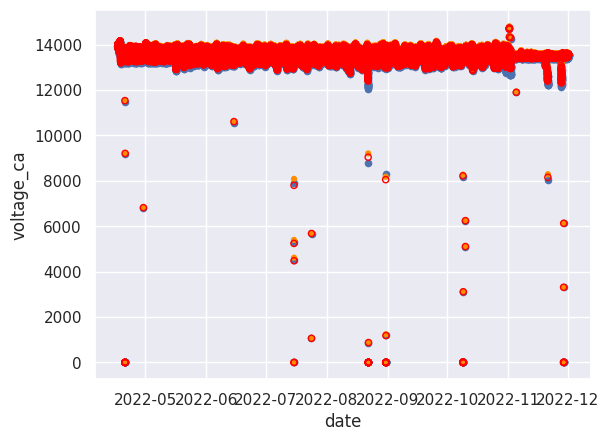

In [214]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','voltage_ab', ax=ax)
frj1n_train.plot.scatter('date','voltage_bc', c='darkorange', edgecolor='none', ax=ax)
frj1n_train.plot.scatter('date','voltage_ca', c='none', edgecolor='red', ax=ax)

*Diagrama de dispersión del **Voltaje Promedio** de las tres fases*

<Axes: xlabel='date', ylabel='voltage_avg'>

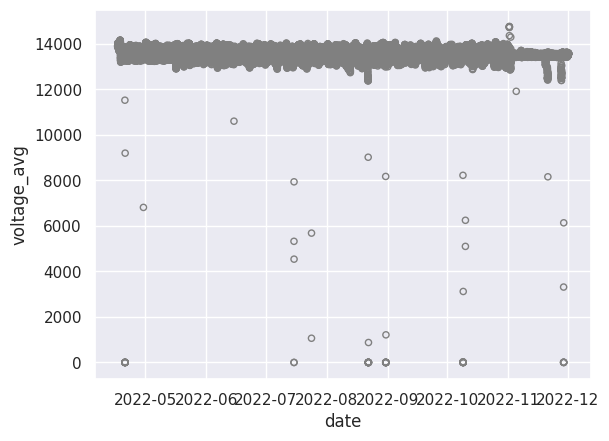

In [215]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','voltage_avg', c='none', edgecolor='gray', ax=ax)

*Diagrama de dispersión de la **Corriente** de cada una de las fases*

> *Se observa un leve desbalance en la carga para la Fase A (azul)*



<Axes: xlabel='date', ylabel='current_c'>

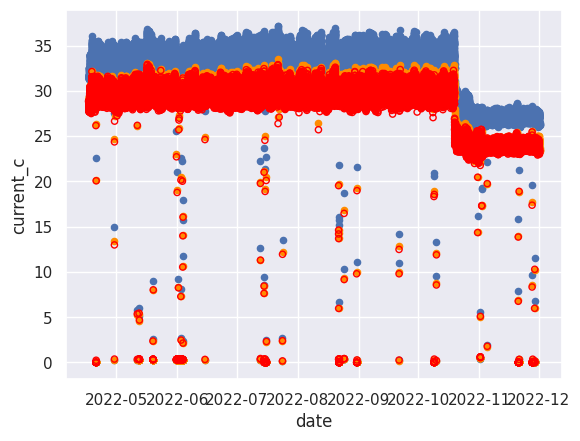

In [216]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','current_a', ax=ax)
frj1n_train.plot.scatter('date','current_b', c='darkorange', ax=ax)
frj1n_train.plot.scatter('date','current_c', c='none', edgecolor='red', ax=ax)

*Comportamiento de la corriente de carga promedio en el tiempo*

<Axes: xlabel='date', ylabel='current_avg'>

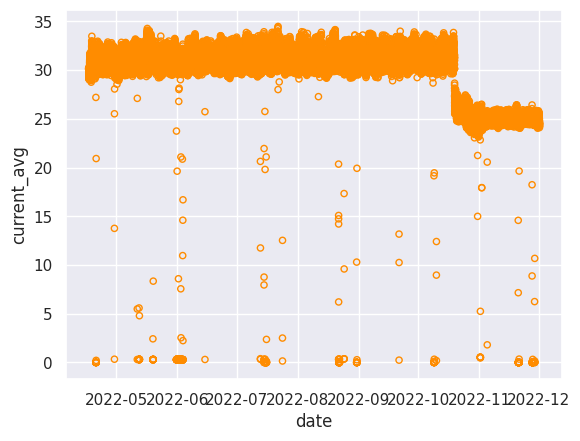

In [217]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','current_avg',c='none', edgecolor='darkorange', ax=ax)

### Triangulo de potencias (kW, kVA, kVAR)

* kW = potencia activa
* kVA = potencia aparente
* kVAR = potencia reactiva


<Axes: xlabel='date', ylabel='true_power'>

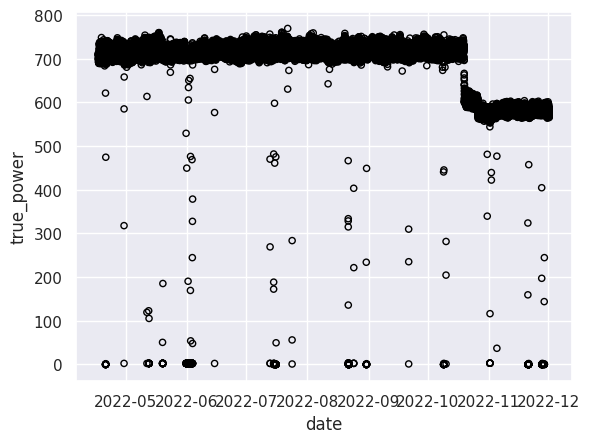

In [218]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','true_power',c='none', edgecolor='black', ax=ax)

<Axes: xlabel='date', ylabel='reactive_power'>

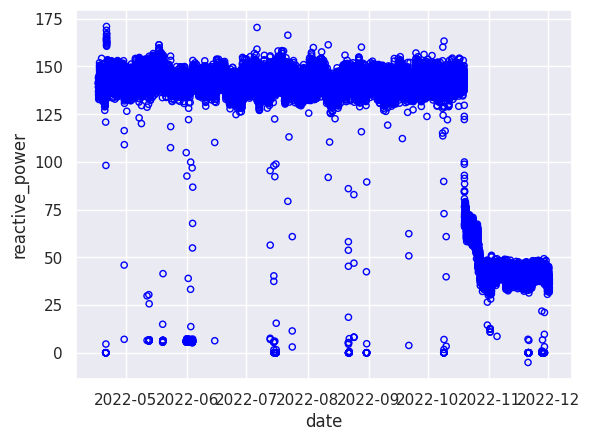

In [219]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','reactive_power',c='none', edgecolor='blue', ax=ax)

<Axes: xlabel='date', ylabel='apparent_power'>

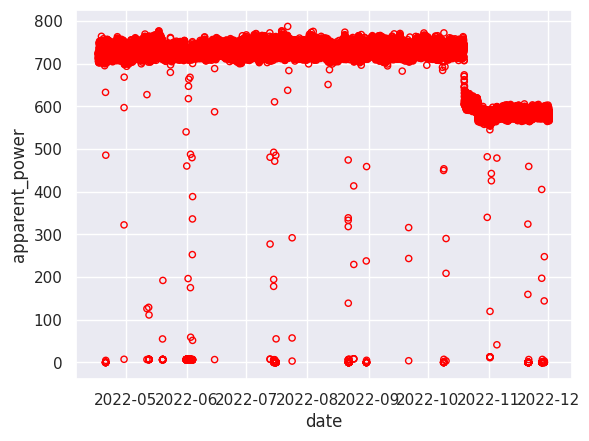

In [220]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','apparent_power',c='none', edgecolor='red', ax=ax)

### Frecuencia

<Axes: xlabel='date', ylabel='frequency'>

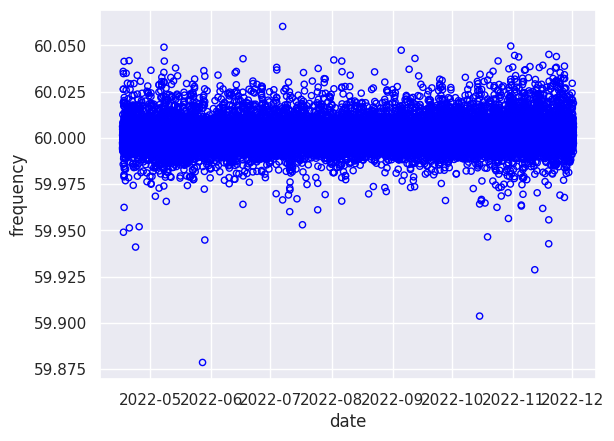

In [221]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','frequency',c='none', edgecolor='blue', ax=ax)

### *Voltaje de Desbalance (voltage_unbalance)*

<Axes: xlabel='date', ylabel='voltage_unbalance'>

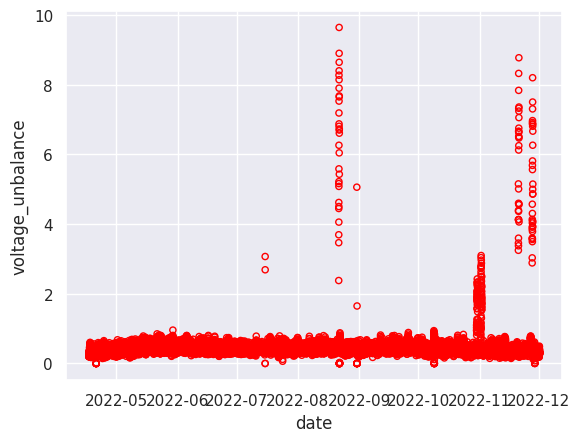

In [222]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('date','voltage_unbalance',c='none', edgecolor='red', ax=ax)

### Variable respuesta: Commute

<Axes: xlabel='commute', ylabel='count'>

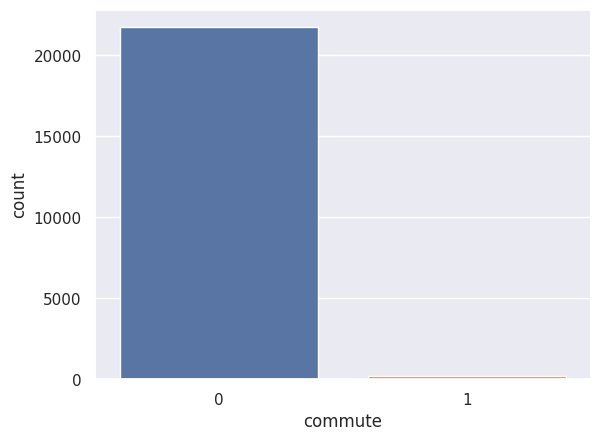

In [223]:
fig, ax = plt.subplots()
sns.countplot(data=frj1n_train,x='commute', ax=ax)

Obervaciones: se cuenta con un dataset completamente desbalanceado para la variable respuesta (commute), que indica las veces que se vuelve necesario realizar una conmutación de energía

## Variables predictoras 

Estas son las variables que consideramos tienen mayor incidencia en la variable respuesta, para las cuales aplicamos cuatro tipos de graficos

1.   Cajas
2.   Histograma
3.   Violin
4.   Densidad

Y las variables son:

*   voltage_avg
*   current_avg
*   frequency
*   true_power

### *Voltaje Promedio Linea a Linea (voltage_avg)*

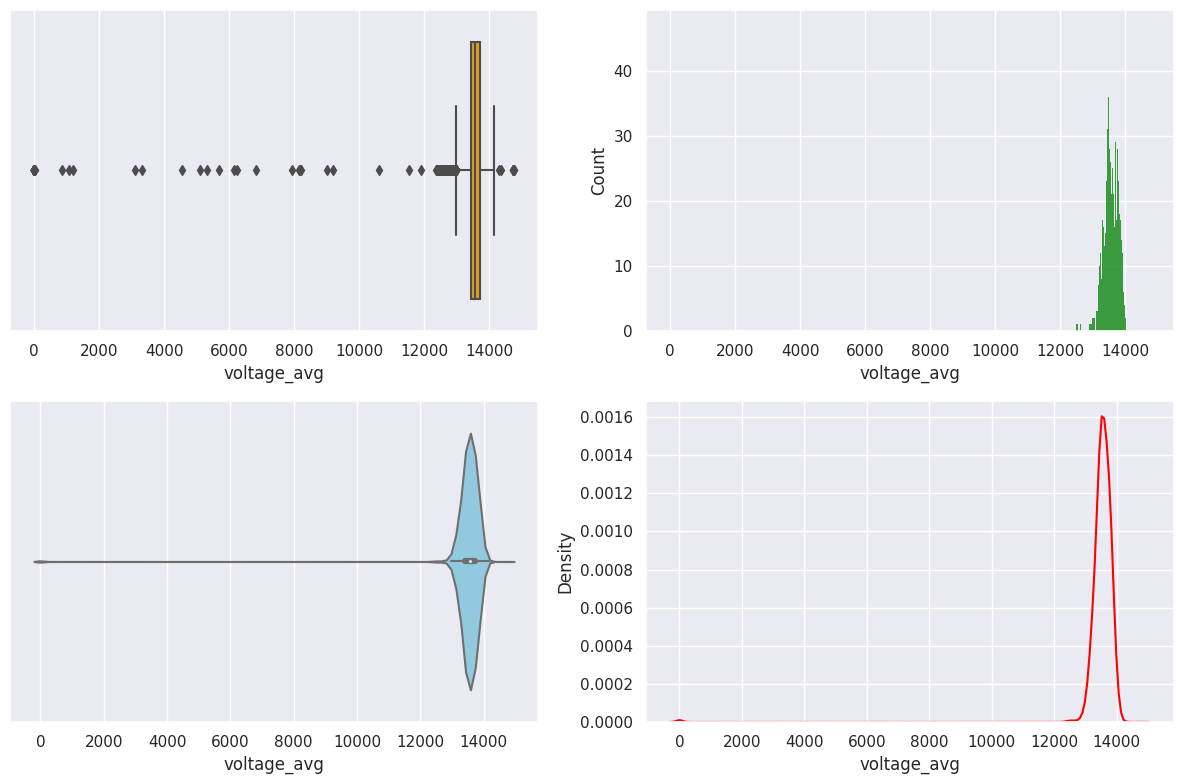

In [224]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=frj1n_train, x='voltage_avg', orient='h', color="orange", ax=axs[0,0])
sns.histplot(data=frj1n_train,x='voltage_avg', color="green", binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n_train,x='voltage_avg', color="skyblue", ax=axs[1,0])
sns.kdeplot(data=frj1n_train, x='voltage_avg', color="red", ax=axs[1,1])
plt.tight_layout()

### *Corriente Promedio Trifasica (current_avg)*

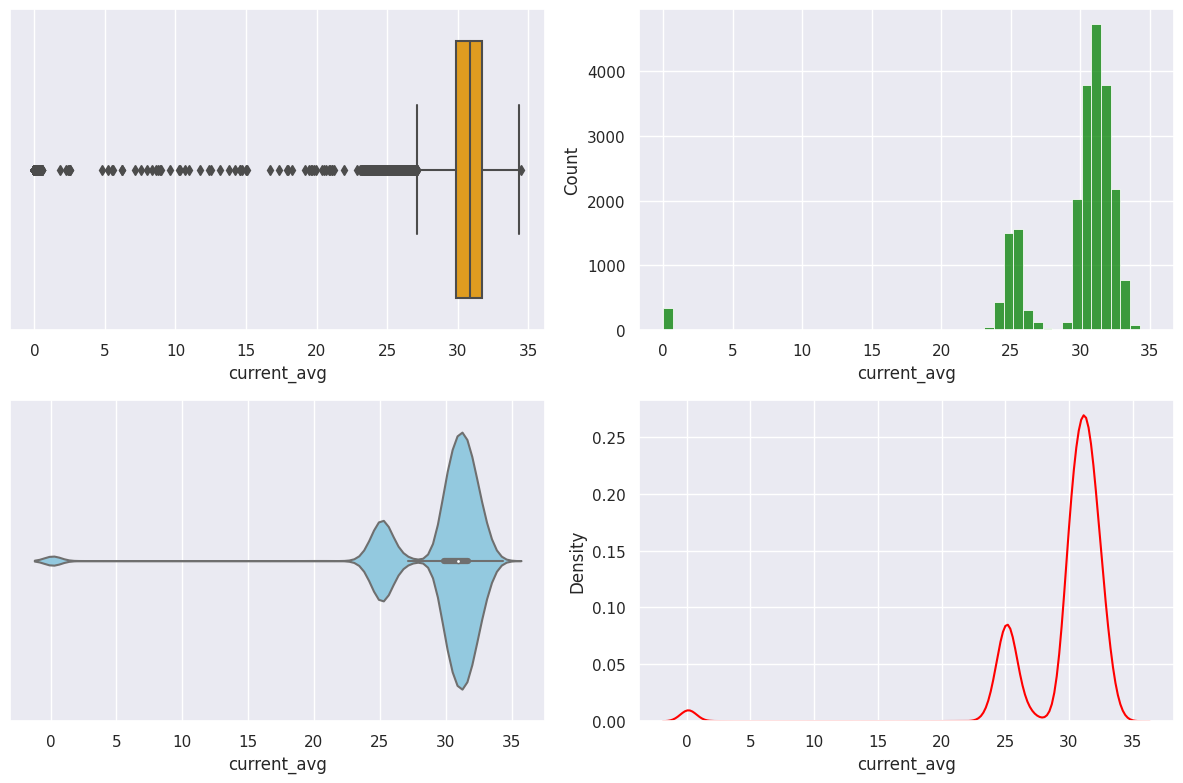

In [225]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=frj1n_train, x='current_avg', orient='h', color="orange", ax=axs[0,0])
sns.histplot(data=frj1n_train,x='current_avg', color="green", binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n_train,x='current_avg', color="skyblue", ax=axs[1,0])
sns.kdeplot(data=frj1n_train, x='current_avg', color="red", ax=axs[1,1])
plt.tight_layout()

### *Frecuencia (para Guatemala 60Hz)*

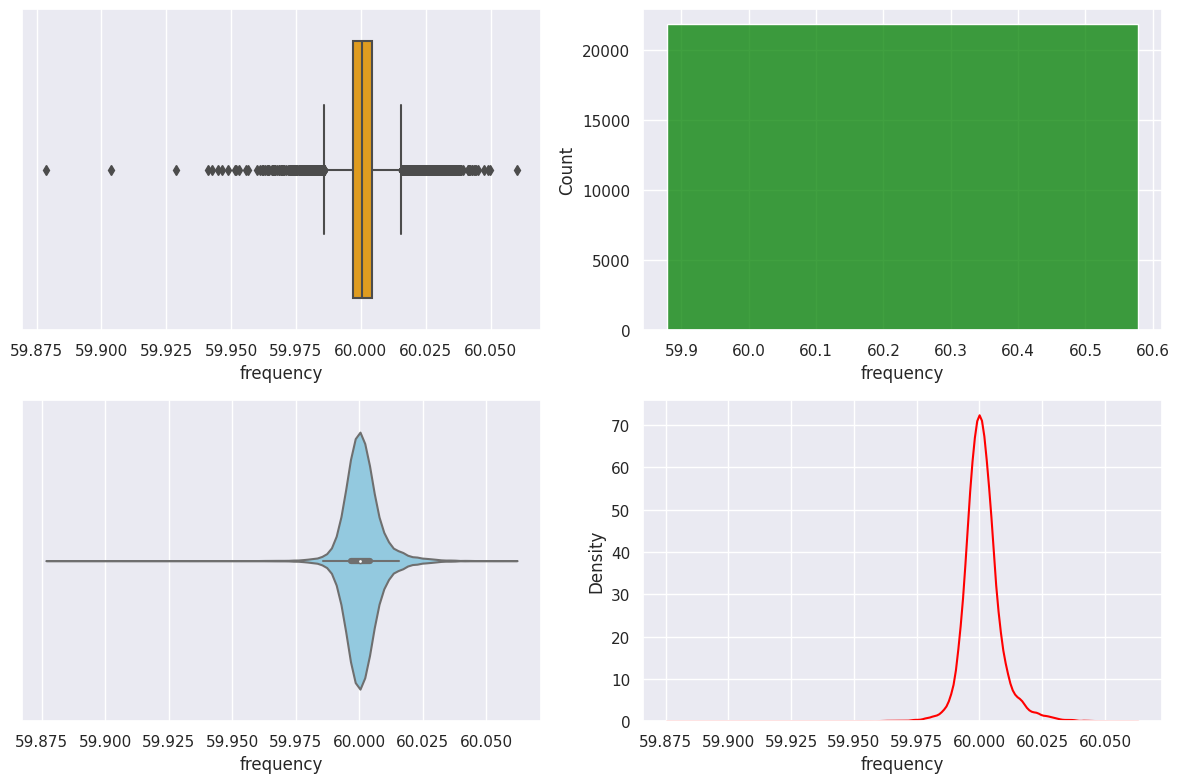

In [226]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=frj1n_train, x='frequency', orient='h', color="orange", ax=axs[0,0])
sns.histplot(data=frj1n_train,x='frequency', color="green", binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n_train,x='frequency', color="skyblue", ax=axs[1,0])
sns.kdeplot(data=frj1n_train, x='frequency', color="red", ax=axs[1,1])
plt.tight_layout()

### *Potencia Activa Promedio (true_power)*

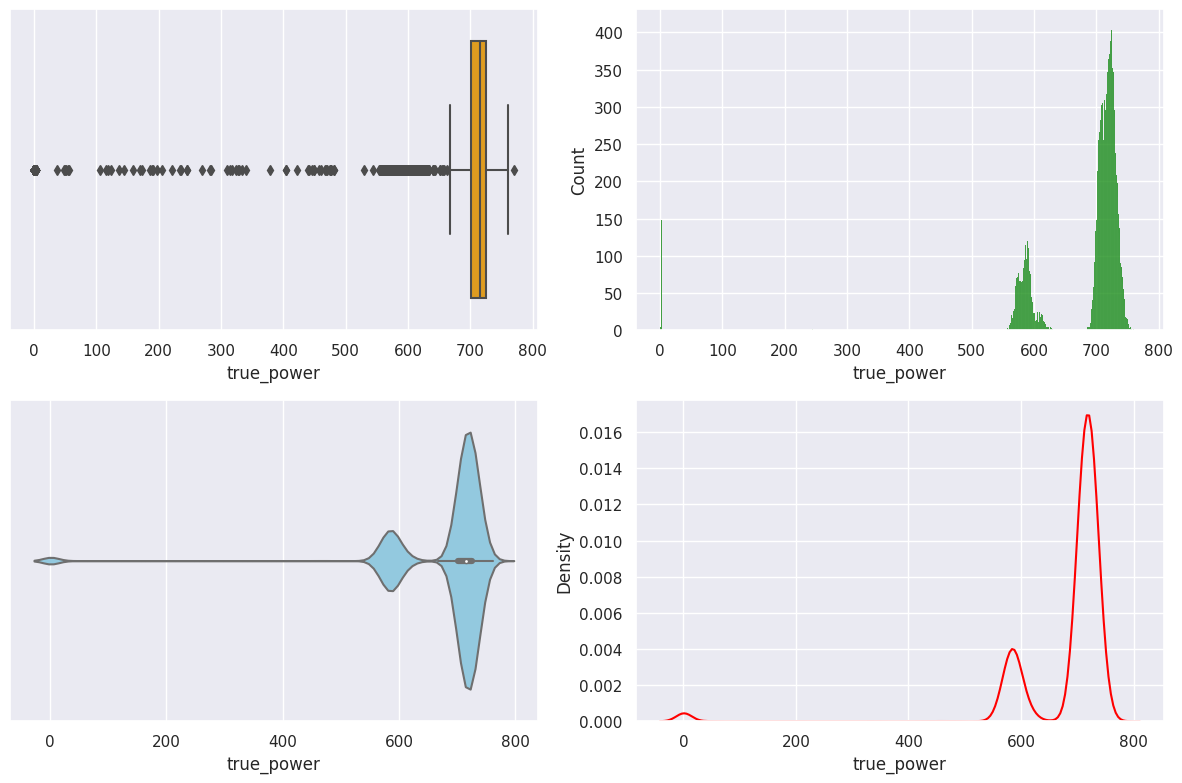

In [227]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=frj1n_train, x='true_power', orient='h', color="orange", ax=axs[0,0]) #los outliers refieren a cortes de energia
sns.histplot(data=frj1n_train,x='true_power', color="green", binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n_train,x='true_power', color="skyblue", ax=axs[1,0])
sns.kdeplot(data=frj1n_train, x='true_power', color="red", ax=axs[1,1])
plt.tight_layout()

Observaciones: de los conjuntos de gráficos anteriores, se observa una districión principalmente normal (aunque sesgada).

En el caso de la corriente y de la potencia, se tiene una distribución bi-modal. Esto se debe a una disminución en la carga del Centro Técnico. Sin embargo en ambos casos, continúa centrada respecto a la media de su moda.

## Comparación de features

### *Potencia Activa Promedio vs Voltaje linea-linea Promedio*

<Axes: xlabel='true_power', ylabel='voltage_avg'>

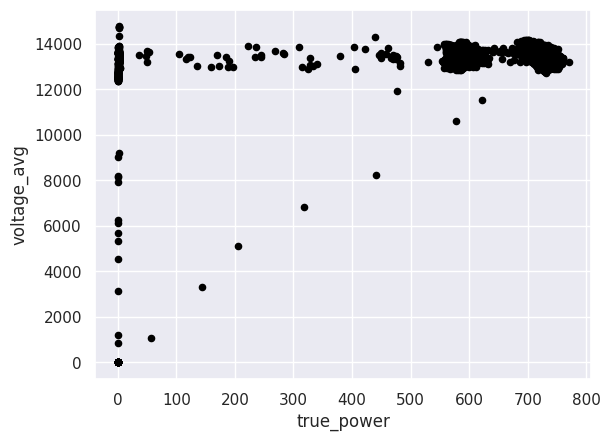

In [228]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('true_power','voltage_avg', color="black",ax=ax)

### *Voltaje linea-linea promedio vs Corriente promedio*

<Axes: xlabel='current_avg', ylabel='voltage_avg'>

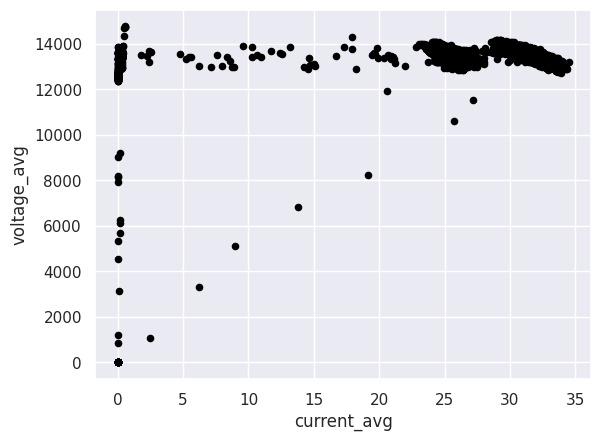

In [229]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('current_avg','voltage_avg', color="black",ax=ax)

Observaciones: de los gráficos de dispersión anteriores, se puede suponer que la variable voltage_avg no tiene relación directa con la potencia activa ni la corriente promedio

### *Potencia activa promedio vs corriente promedio - correlacionado*


<Axes: xlabel='true_power', ylabel='current_avg'>

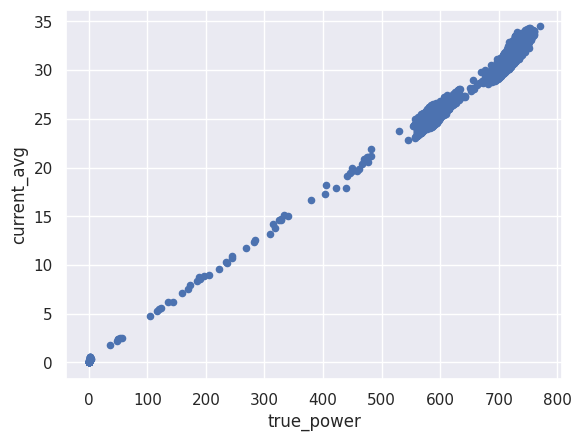

In [230]:
fig, ax = plt.subplots()
frj1n_train.plot.scatter('true_power','current_avg', ax=ax)

Observaciones: se tiene una relación directamente proporcional (y=x) entre las features de TRUE_POWER y CURRENT_AVG. Lo cuál es esperado debido a la fórmula de w = i*v. Debido a esto, se puede llegar a pensar en descartar la variable true_power, sin embargo no se hará para validar si con alguna transformación nos puede mostrar influencia sobre la variable respuesta.

## Resumen  de la densidad de las features numericas

*Para elaborar el siguiente grafico de densidad eliminaron las 2 variables que no son numericas*

In [231]:
df = pd.DataFrame(data=frj1n_train)
del df['date']
del df['commute']

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

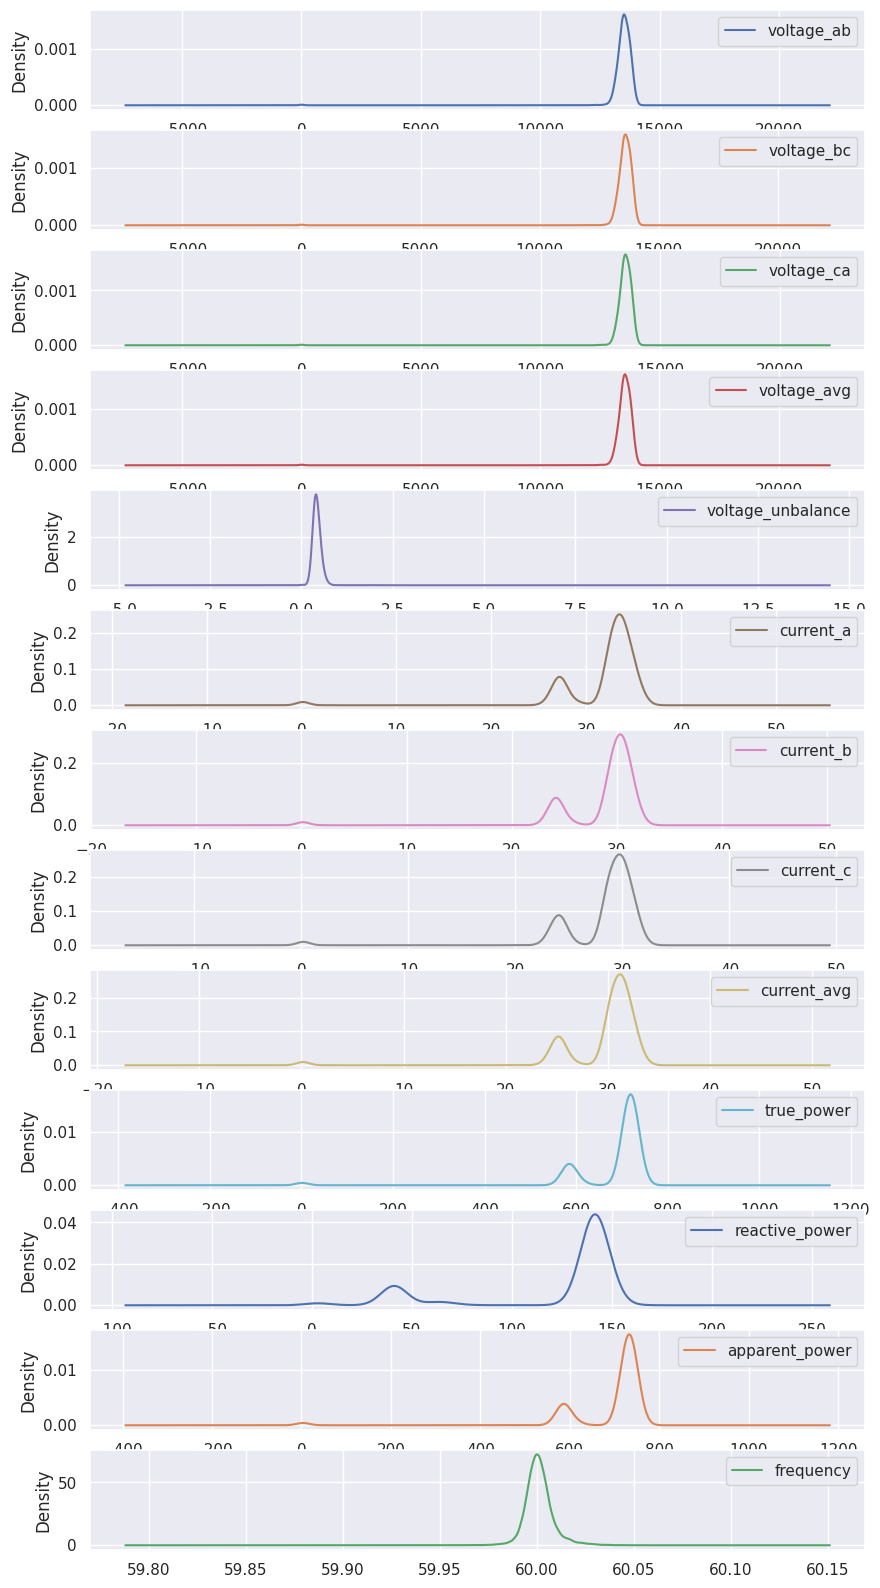

In [232]:
df.plot.kde(subplots=True, figsize=(10,20), sharex=False)

Observaciones: los Aires Acondicionados representan un aporte significativo en la demanda de potencia reactiva, ya que fueron los que se sacaron hacia el plan de contingencia

## Relación de las features predictoras versus la variable respuesta

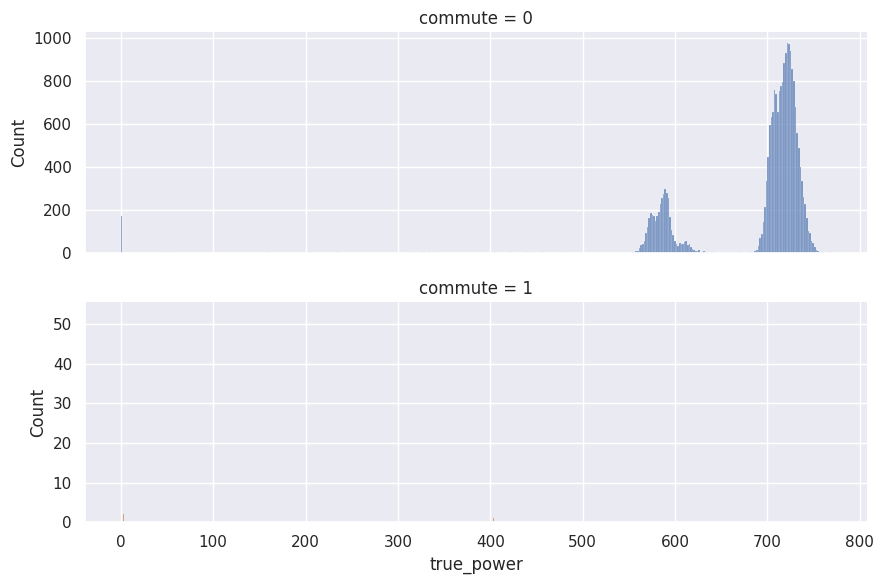

In [233]:
g = sns.FacetGrid(frj1n_train, sharey=False, row='commute',  hue='commute',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='true_power')#, log_scale=True, binwidth=0.03)

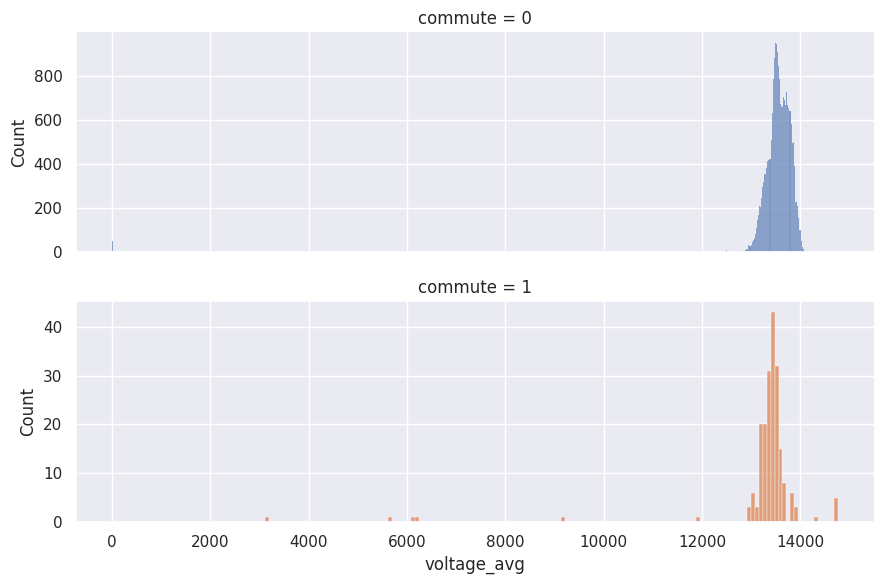

In [234]:
g = sns.FacetGrid(frj1n_train, sharey=False, row='commute',  hue='commute',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='voltage_avg')#, log_scale=True, binwidth=0.03)

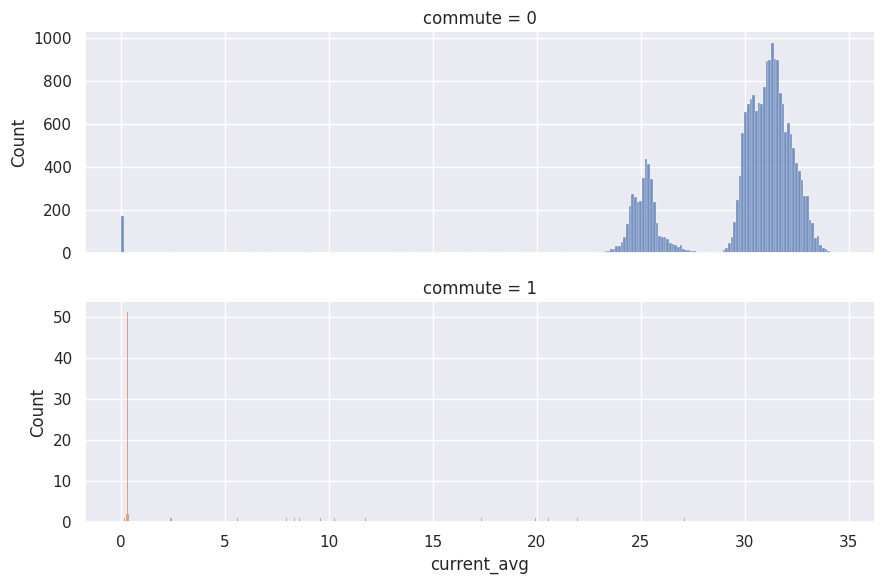

In [235]:

g = sns.FacetGrid(frj1n_train, sharey=False, row='commute',  hue='commute',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='current_avg')#, log_scale=True, binwidth=0.03)

Nota: tanto la potencia activa (true_power) cómo la corriente promedio (current_avg), no se muestran muy presentes cuándo la variable respuesta (commute) es 1. Esto debido a que estas dos variables prácticamente se vuelven 0 cuando conmuta la energía, ya que dejamos de consumir energía comercial

### Consideración de variable: Reactive Power

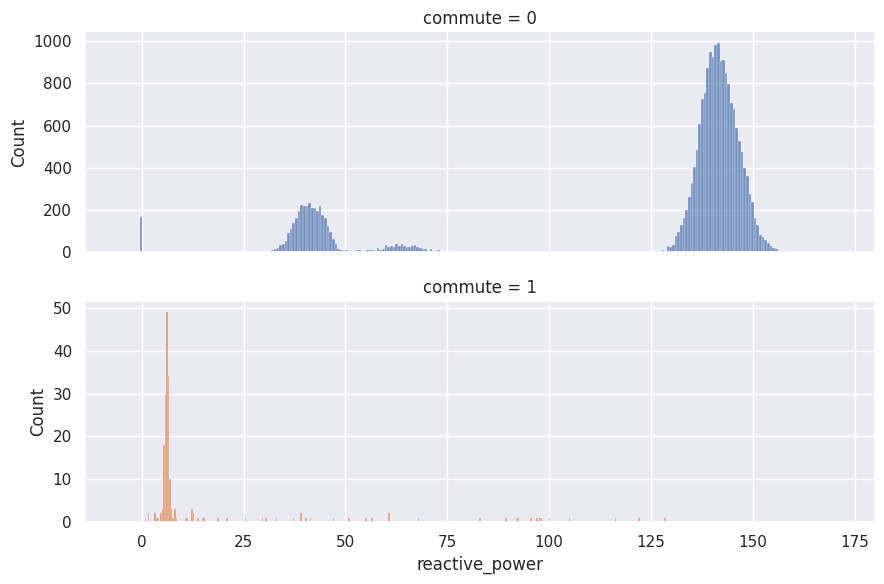

In [236]:
g = sns.FacetGrid(frj1n_train, sharey=False, row='commute',  hue='commute',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='reactive_power')#, log_scale=True, binwidth=0.03)

In [237]:
# variable 'true_power' por día
hora = frj1n_train.groupby(pd.Grouper(key='date', axis=0, 
                      freq='D')).median()

<Axes: xlabel='true_power', ylabel='Count'>

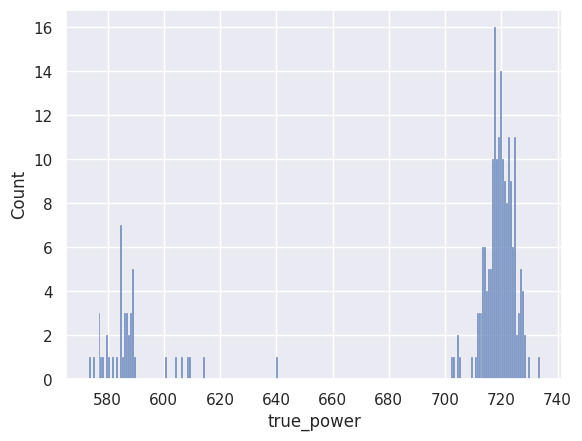

In [238]:
#Grafico Histograma
sns.histplot(data=hora,x='true_power', binwidth=0.7)

# Distribucion Bimodal, lo que se explica por la disminucion de la carga por la implementacion de la contingencia en la 
# subestacion.

## Analisis Actual del Set de Datos (Referencia)

> Dejamos la refencia de lo que actualmente en nuestra area se trabaja con el dataset, ya que con las herramientas adquiridas en el curso se esta ampliando el alcande de uso.



Datos agrupados por dia; se toma el valor maximo de cada día para discriminar los cortes de energia durante periodos cortos

In [239]:
frj = frj1n_train.groupby(pd.Grouper(key='date', axis=0, 
                      freq='D')).max()

Visualizacion del comportamiento de la potencia en el tiempo.

<Axes: xlabel='date'>

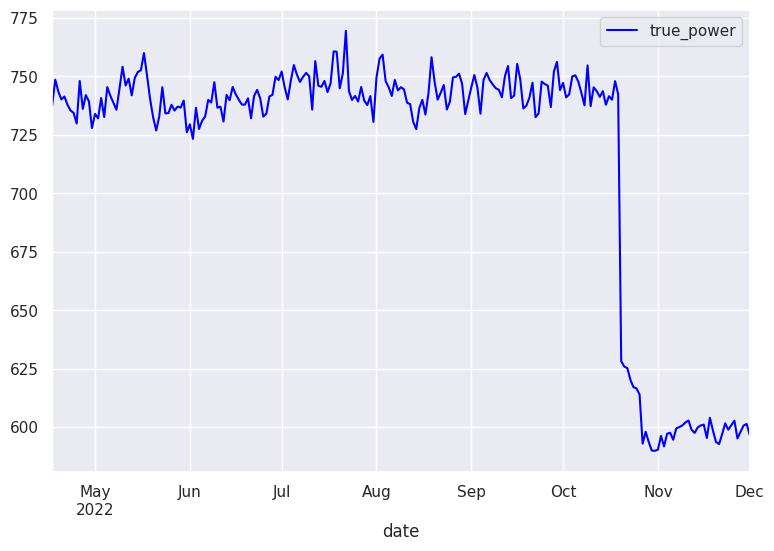

In [240]:
frj.plot.line(y="true_power",
                color = "blue",
                figsize =(9,6))

# Creacion de nuevas Features ⚒

## Features Categoricas 

### Voltaje Promedio Clasificado

Creacion de variables categoricas de los voltajes

Según el manual de operación del Centro Técnico, el voltaje se categoriza de la siguiente manera:

*   Si es menor a 95% del voltaje nominal, se considera Voltaje Bajo
*   Si es mayor a 105% del voltaje nominal, se considera Voltaje Alto
*   Si se encuentra dentro de ese rango, se considera Voltaje Normal de Operación

> *El voltaje nominal de la red electrica de la EEGSA para el suministro de energia en media tension es de 13,600 V*




In [241]:
vnominal = 13600 

frj1n_train['vclasif_ab'] = frj1n_train.voltage_ab.map(lambda x : 'Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo" if (x <= 0.95 * vnominal) else "Alto" ))
frj1n_train['vclasif_bc'] = frj1n_train.voltage_bc.map(lambda x : 'Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo" if (x <= 0.95 * vnominal) else "Alto" ))
frj1n_train['vclasif_ca'] = frj1n_train.voltage_ca.map(lambda x : 'Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo" if (x <= 0.95 * vnominal) else "Alto" ))
frj1n_train['vclasif_avg'] = frj1n_train.voltage_avg.map(lambda x : 'Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo" if (x <= 0.95 * vnominal) else "Alto" ))

In [242]:
frj1n_train['vclasif_ab'].value_counts()

Normal    21658
Bajo        270
Alto          6
Name: vclasif_ab, dtype: int64

In [243]:
frj1n_train['vclasif_bc'].value_counts()

Normal    21778
Bajo        149
Alto          7
Name: vclasif_bc, dtype: int64

In [244]:
frj1n_train['vclasif_ca'].value_counts()

Normal    21750
Bajo        177
Alto          7
Name: vclasif_ca, dtype: int64

In [245]:
frj1n_train['vclasif_avg'].value_counts()

Normal    21738
Bajo        189
Alto          7
Name: vclasif_avg, dtype: int64

In [246]:
sns.set_theme(style="darkgrid")

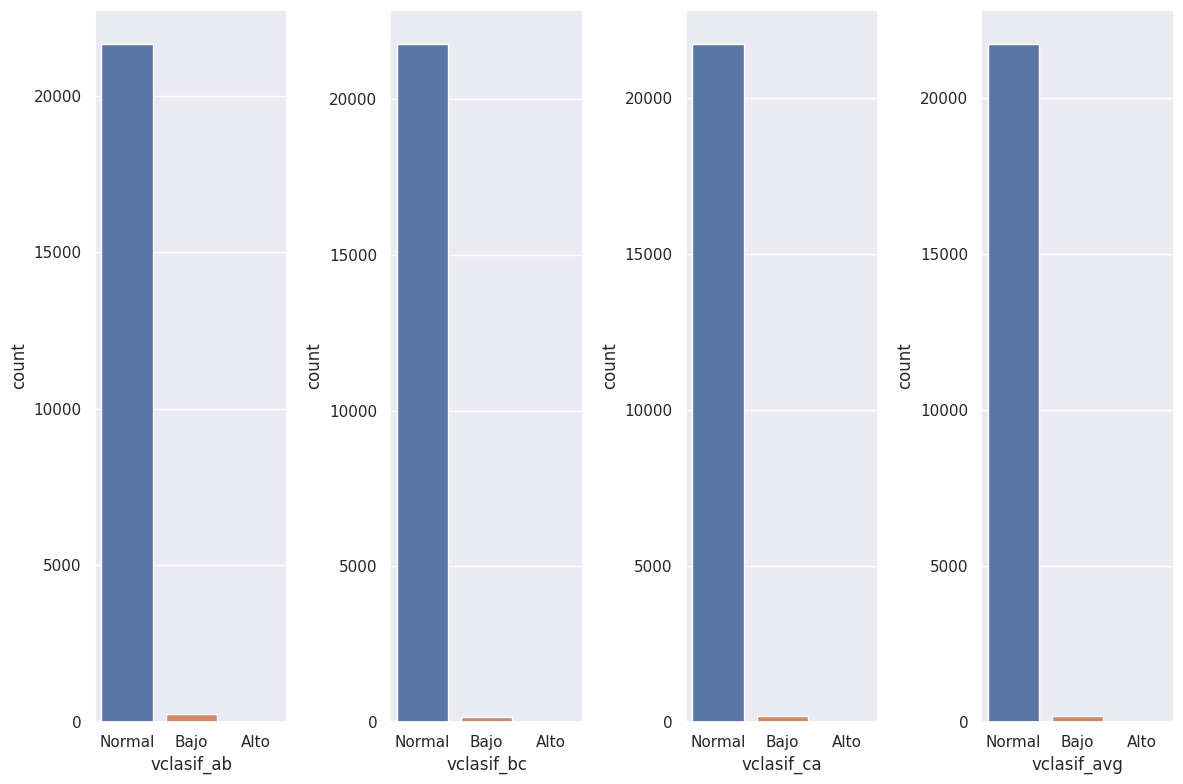

In [247]:
fig, axs = plt.subplots(1,4, figsize=(12,8)) #create grid
sns.countplot(data=frj1n_train,x='vclasif_ab', ax=axs[0])
sns.countplot(data=frj1n_train,x='vclasif_bc', ax=axs[1])
sns.countplot(data=frj1n_train,x='vclasif_ca', ax=axs[2])
sns.countplot(data=frj1n_train,x='vclasif_avg', ax=axs[3])
plt.tight_layout()

Observación: se tomará en cuenta únicamente el Voltaje Promedio dado que representa bien a los voltajes de las tres fases

### Alarma de Potencia Reactiva

Creacion de nueva feature categorica para visualizar advertencia por potencia reactiva de 150 kVAR (seguridad en la operacion por accionamiento de protecciones)

In [248]:
frj1n_train['kvar_warn']=frj1n_train.reactive_power.map(lambda x: 'Warning' if x>150 else 'Ok')

In [249]:
frj1n_train['kvar_warn'].value_counts()

Ok         21184
Warning      750
Name: kvar_warn, dtype: int64

<Axes: xlabel='kvar_warn', ylabel='count'>

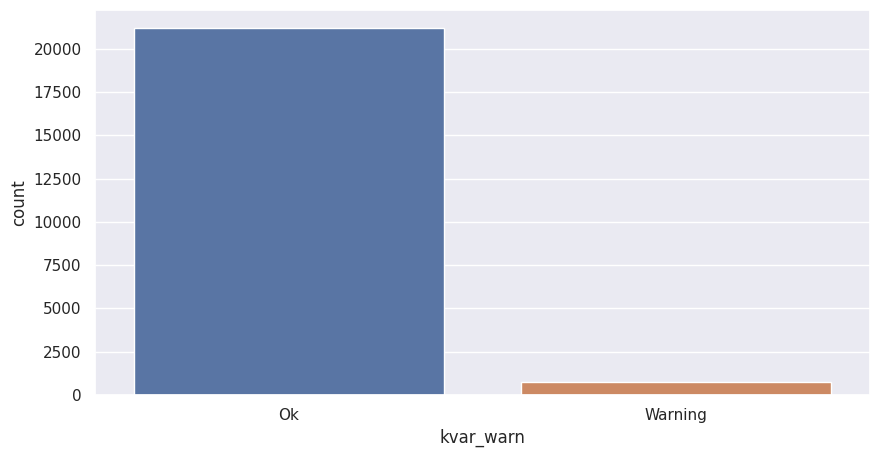

In [250]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(data=frj1n_train,x='kvar_warn')

### Frecuencia Error

De acuerdo al REGLAMENTO DEL MERCADO ELÉCTRICO REGIONAL -RMER- en los citerios de operacion del SISTEMA ELECTRICO 

REGIONAL - SER- en el inciso 16.2.5 Criterios y Parámetros de Calidad indica para la frecuencia de la red:

* 16.2.5   Criterios y Parámetros de Calidad
* 16.2.5.5 La frecuencia nominal del SER es 60 Hz.
* 16.2.5.6 Durante la operación normal, el 90% de las variaciones de la frecuencia promedio en períodos de 10 minutos, deberán estar comprendidas dentro del rango de (60 ± 1.65 σ) Hz, donde σ es la desviación estándar de la frecuencia promedio en períodos de 10 minutos. El valor de σ será de 0.03 Hz.

> Creacion de nueva feature indicando riesgo de operacion por frecuencia fuera de parametros de operacion: 60hz+/- 1.65 * (0.03) hz. sigma = 0.03 hz   [59.5, 60.5]

In [251]:
frj1n_train["frequency"] = pd.to_numeric(frj1n_train["frequency"], errors = 'coerce')

frj1n_train['frequency_error']=frj1n_train.frequency.map(lambda x: 'QoE_Ok' if 60.05>x>59.95 else 'QoE_Out') #QoE = Quality of Energy

In [252]:
frj1n_train['frequency_error'].value_counts()

QoE_Ok     21860
QoE_Out       74
Name: frequency_error, dtype: int64

<Axes: xlabel='frequency_error', ylabel='count'>

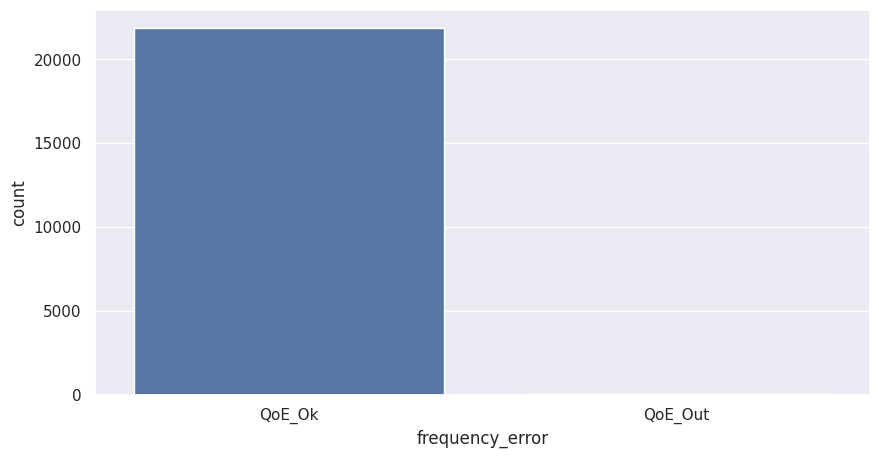

In [253]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(data=frj1n_train,x='frequency_error')

# Limpieza de Outliers 📤

Dichos datos atipicos se pueden eliminar para efectos de analisis, por conocimiento del negocio se toma dicha decision. Se toma en cuenta los datos dentro del 10% al 99%


In [254]:
frj1n_train['voltage_avg'].quantile([0.1,0.5,0.9,0.95,0.99])

0.10    13259.419400
0.50    13557.070285
0.90    13835.928900
0.95    13888.560250
0.99    13990.810460
Name: voltage_avg, dtype: float64

In [255]:
a = frj1n_train['voltage_avg']>frj1n_train['voltage_avg'].quantile(0.1)
a

0        True
1        True
2        True
3        True
4        True
         ... 
21929    True
21930    True
21931    True
21932    True
21933    True
Name: voltage_avg, Length: 21934, dtype: bool

In [256]:
frj1n_10 = frj1n_train[frj1n_train['voltage_avg']>frj1n_train['voltage_avg'].quantile(0.1)].copy()
frj1n_99 = frj1n_10[frj1n_10['voltage_avg']<frj1n_10['voltage_avg'].quantile(0.99)].copy()

Graficos Histograma para evaluar distribucion antes y despues de la limpieza

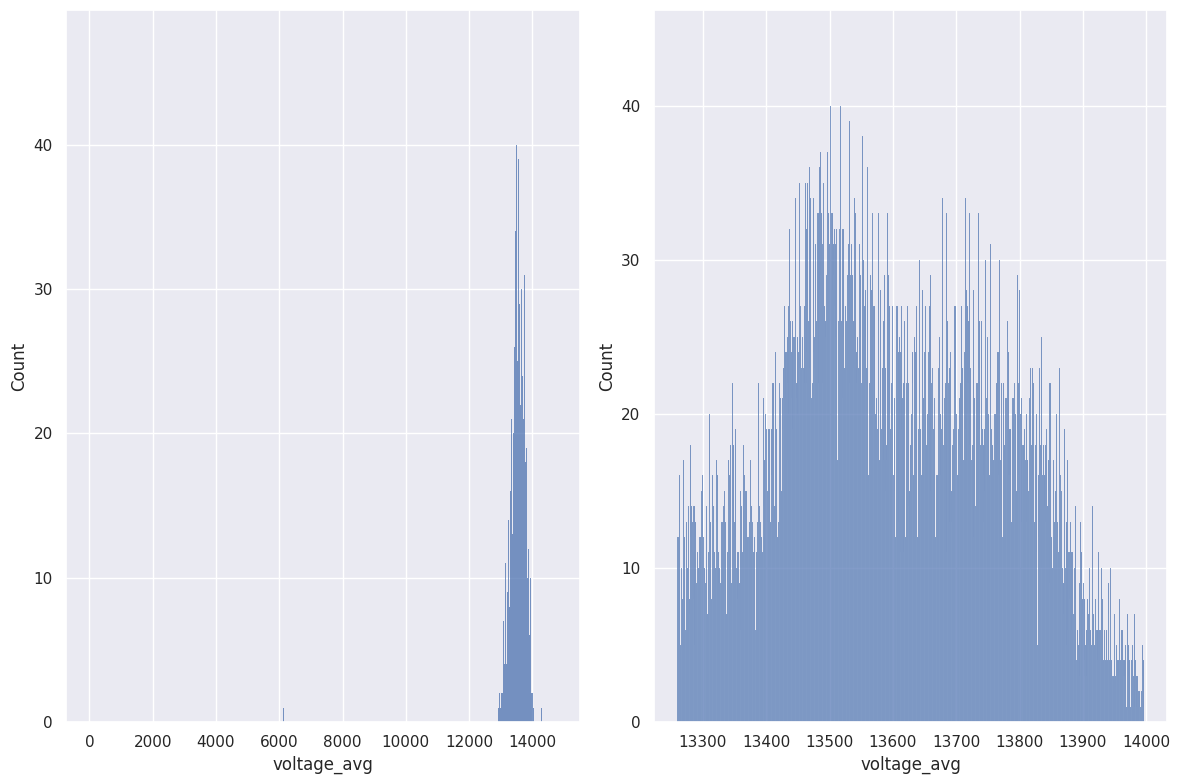

In [257]:
fig, axs = plt.subplots(1,2, figsize=(12,8)) 
sns.histplot(data=frj1n_train,x='voltage_avg', binwidth=0.7, ax=axs[0])
sns.histplot(data=frj1n_99,x='voltage_avg', binwidth=0.7, ax=axs[1])
plt.tight_layout()



A continuación se observa que el valor mínimo de las features de Voltaje, ya no es cero. Con eso se comprueba el funcionamiento de outliers (también gráficamente arriba)

In [258]:
frj1n_99.describe()

,voltage_ab,voltage_bc,voltage_ca,voltage_avg,voltage_unbalance,current_a,current_b,current_c,current_avg,true_power,reactive_power,apparent_power,frequency,commute
count,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000
mean,13560.563363,13646.085929,13587.951138,13598.200174,0.418667,31.974073,28.793219,28.262401,29.676564,685.960026,121.570102,697.432198,60.001090,0.007829
std,177.171671,175.825240,169.394426,173.744929,0.099976,3.900478,3.596967,3.481048,3.657581,82.172441,40.136442,85.873560,0.007436,0.088138
min,13144.606000,13277.822000,13238.346000,13259.425000,0.121956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.878582,0.000000
25%,13427.201750,13513.537000,13460.249233,13467.271250,0.350980,32.156620,29.076407,28.351915,29.871105,700.130188,134.421852,713.341614,59.996971,0.000000
50%,13545.699000,13633.640000,13574.185785,13584.069500,0.406203,33.145767,29.954344,29.296081,30.802096,713.482941,139.871338,727.247681,60.000591,0.000000
75%,13699.829000,13785.276500,13722.148000,13735.656830,0.474316,33.912554,30.616584,30.045553,31.525524,723.784759,143.704312,737.898407,60.004486,0.000000
max,13976.306000,14053.336000,13996.548000,13995.971000,2.379739,36.312805,32.600735,32.254997,33.674641,760.718201,170.949509,777.091919,60.060234,1.000000


In [263]:
frj1n_99_bk = frj1n_99

# Transformaciones Variables Numericas 💻

## Min Max Scaler

### Feature: voltage_avg

In [259]:
from sklearn.preprocessing import MinMaxScaler

In [260]:
mm_scaler = MinMaxScaler()

In [261]:
col_name = 'voltage_avg'
trans_col_name = 'voltage_avg_mm'
frj1n_train[trans_col_name] = mm_scaler.fit_transform(frj1n_train[[col_name]])
frj1n_99[trans_col_name] = mm_scaler.fit_transform(frj1n_99[[col_name]])

<Axes: xlabel='voltage_avg_mm', ylabel='Count'>

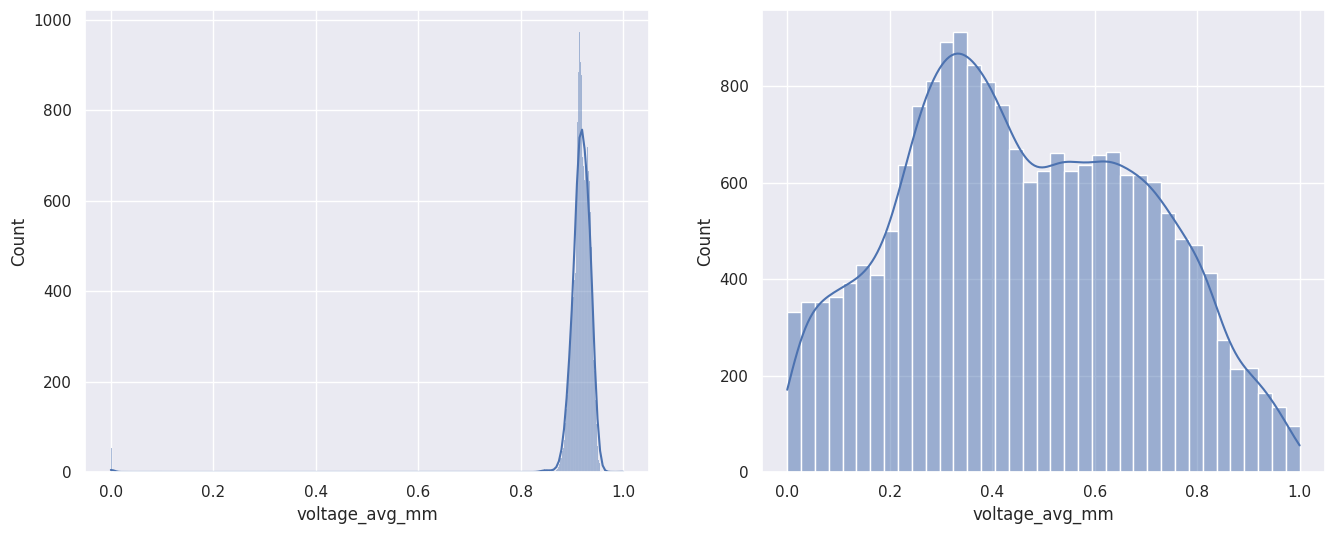

In [262]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=frj1n_train, x=trans_col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=frj1n_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (10 & 99 percentile)')



> Se utiliza el condificador MinMax Scaler ya que los datos se encuentran dentro de un rango de operacion definidos con una distribucion que se asemeja a la normal con un sesgo hacia la izquierda, es decir bajo voltaje, que podria ser provocado por la red electrica del lado del distribuidor.



> Se realiza la comparación del MinMax Scaler sin y con limpieza de outliers, donde se evidencia una mejor distribución





## Standar Scaler o Normalizacion

### Feature: voltage_avg

In [265]:
from sklearn.preprocessing import StandardScaler

In [266]:
sd_scaler = StandardScaler( )
sd_scaler2 = StandardScaler(with_mean=False, with_std=True)

In [267]:
col_name = 'voltage_avg'
trans_col_name = 'voltage_avg_sd'
frj1n_train[trans_col_name]= sd_scaler.fit_transform(frj1n_train[['voltage_avg']])
frj1n_99[trans_col_name]= sd_scaler.fit_transform(frj1n_99[['voltage_avg']])
frj1n_99[f'{trans_col_name}_2']= sd_scaler2.fit_transform(frj1n_99[['voltage_avg']])

<Axes: xlabel='voltage_avg_sd_2', ylabel='Count'>

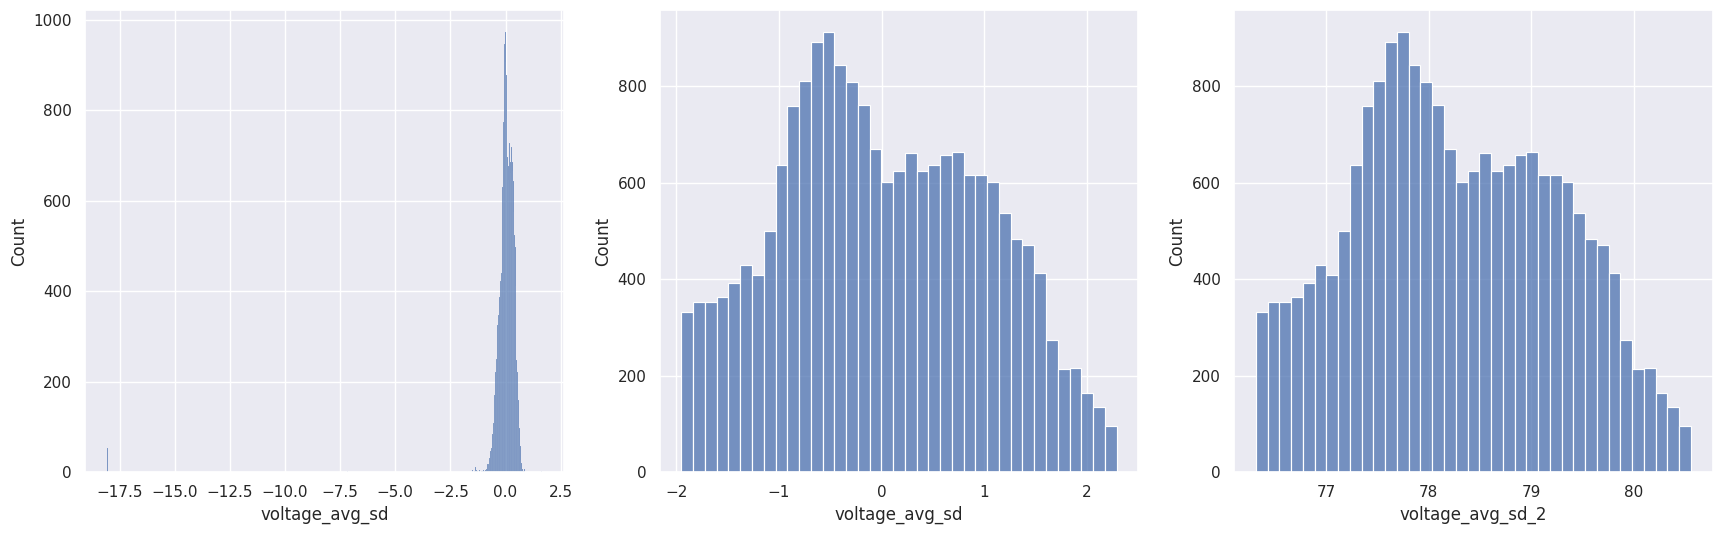

In [268]:
fig, axes = plt.subplots(ncols=3, figsize=(21,6))
sns.histplot(data=frj1n_train, x=trans_col_name, ax=axes[0])
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=frj1n_99, x=trans_col_name, ax=axes[1])
sns.histplot(data=frj1n_99, x=f'{trans_col_name}_2', ax=axes[2])
# axes[1].set_title('Histogram of training data with no outliers (10 & 99 percentile)')



> Los datos se encuentran centrados a cero, y escalados de acuerdo a la varianza. Este tipo de normalizacion se ve afectada por los datos atipicos en el set de datos, y a pesar de que fueron eliminados antes de realizar la codificacion vemos que ahora tenemos valores negativos en los predictores por lo que se considera mejor utilizar el escaldo MinMax ya que el rango nos queda entre 0 y 1 o bien tomar la escala respecto a la desviación estándard



## Robust Scaler

In [269]:
from sklearn.preprocessing import RobustScaler

In [270]:
rb_scaler = RobustScaler ( )

In [271]:
frj1n_99.describe()


,voltage_ab,voltage_bc,voltage_ca,voltage_avg,voltage_unbalance,current_a,current_b,current_c,current_avg,true_power,reactive_power,apparent_power,frequency,commute,voltage_avg_mm,voltage_avg_sd,voltage_avg_sd_2
count,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,1.954200e+04,19542.000000
mean,13560.563363,13646.085929,13587.951138,13598.200174,0.418667,31.974073,28.793219,28.262401,29.676564,685.960026,121.570102,697.432198,60.001090,0.007829,0.459951,4.057751e-16,78.267309
std,177.171671,175.825240,169.394426,173.744929,0.099976,3.900478,3.596967,3.481048,3.657581,82.172441,40.136442,85.873560,0.007436,0.088138,0.235891,1.000026e+00,1.000026
min,13144.606000,13277.822000,13238.346000,13259.425000,0.121956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.878582,0.000000,0.000000,-1.949892e+00,76.317417
25%,13427.201750,13513.537000,13460.249233,13467.271250,0.350980,32.156620,29.076407,28.351915,29.871105,700.130188,134.421852,713.341614,59.996971,0.000000,0.282190,-7.535890e-01,77.513720
50%,13545.699000,13633.640000,13574.185785,13584.069500,0.406203,33.145767,29.954344,29.296081,30.802096,713.482941,139.871338,727.247681,60.000591,0.000000,0.440766,-8.133208e-02,78.185977
75%,13699.829000,13785.276500,13722.148000,13735.656830,0.474316,33.912554,30.616584,30.045553,31.525524,723.784759,143.704312,737.898407,60.004486,0.000000,0.646574,7.911608e-01,79.058470
max,13976.306000,14053.336000,13996.548000,13995.971000,2.379739,36.312805,32.600735,32.254997,33.674641,760.718201,170.949509,777.091919,60.060234,1.000000,1.000000,2.289454e+00,80.556763


### Feature: current_avg

In [272]:
col_name = 'current_avg'
trans_col_name = 'current_avg_rb'
frj1n_train[trans_col_name]= rb_scaler.fit_transform(frj1n_train[[col_name]])
frj1n_99[trans_col_name]= rb_scaler.fit_transform(frj1n_99[[col_name]])

In [273]:
frj1n_99.describe()

,voltage_ab,voltage_bc,voltage_ca,voltage_avg,voltage_unbalance,current_a,current_b,current_c,current_avg,true_power,reactive_power,apparent_power,frequency,commute,voltage_avg_mm,voltage_avg_sd,voltage_avg_sd_2,current_avg_rb
count,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,1.954200e+04,19542.000000,19542.000000
mean,13560.563363,13646.085929,13587.951138,13598.200174,0.418667,31.974073,28.793219,28.262401,29.676564,685.960026,121.570102,697.432198,60.001090,0.007829,0.459951,4.057751e-16,78.267309,-0.680318
std,177.171671,175.825240,169.394426,173.744929,0.099976,3.900478,3.596967,3.481048,3.657581,82.172441,40.136442,85.873560,0.007436,0.088138,0.235891,1.000026e+00,1.000026,2.210794
min,13144.606000,13277.822000,13238.346000,13259.425000,0.121956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.878582,0.000000,0.000000,-1.949892e+00,76.317417,-18.618066
25%,13427.201750,13513.537000,13460.249233,13467.271250,0.350980,32.156620,29.076407,28.351915,29.871105,700.130188,134.421852,713.341614,59.996971,0.000000,0.282190,-7.535890e-01,77.513720,-0.562729
50%,13545.699000,13633.640000,13574.185785,13584.069500,0.406203,33.145767,29.954344,29.296081,30.802096,713.482941,139.871338,727.247681,60.000591,0.000000,0.440766,-8.133208e-02,78.185977,0.000000
75%,13699.829000,13785.276500,13722.148000,13735.656830,0.474316,33.912554,30.616584,30.045553,31.525524,723.784759,143.704312,737.898407,60.004486,0.000000,0.646574,7.911608e-01,79.058470,0.437271
max,13976.306000,14053.336000,13996.548000,13995.971000,2.379739,36.312805,32.600735,32.254997,33.674641,760.718201,170.949509,777.091919,60.060234,1.000000,1.000000,2.289454e+00,80.556763,1.736286


<Axes: xlabel='current_avg_rb', ylabel='Count'>

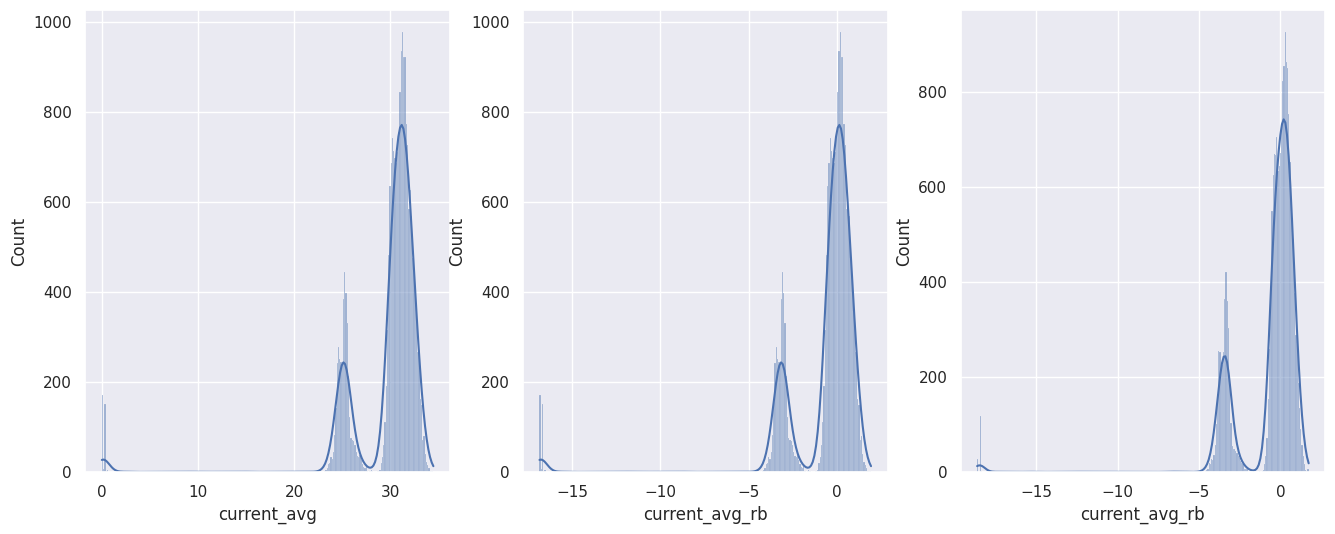

In [275]:
fig, axes = plt.subplots(ncols=3, figsize=(16,6))
sns.histplot(data=frj1n_train, x=col_name, ax=axes[0], kde=True)
sns.histplot(data=frj1n_train, x=trans_col_name, ax=axes[1], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=frj1n_99, x=trans_col_name, ax=axes[2],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (10 & 99 percentile)')


Observación: se tiene las siguientes gráficas en comparación:


1.   Distribución de la Corriente Promedio
2.   Distribución de la Corriente Promedio transformada con RobustScaler
3.   Distribución de la Corriente Promedio transformada con RobustScaler y con limpieza de outliers

De lo anterior, no se observa diferencia significativa, concluyendo que esta transformación no brinda ningún beneficio. Para obtener un mejor resultado con este método de transformación, necesitaríamos recortar más los datos para abarcar la densidad principal, pero implicaría perder muchos valores del Dataset completo. Debido al rango de esta variable, es sugerible intentar con un MinMax o Normalizacion.

## Transformacion Box Cox / Yeo Johnson

In [276]:
frj1n_99.describe()

,voltage_ab,voltage_bc,voltage_ca,voltage_avg,voltage_unbalance,current_a,current_b,current_c,current_avg,true_power,reactive_power,apparent_power,frequency,commute,voltage_avg_mm,voltage_avg_sd,voltage_avg_sd_2,current_avg_rb
count,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,1.954200e+04,19542.000000,19542.000000
mean,13560.563363,13646.085929,13587.951138,13598.200174,0.418667,31.974073,28.793219,28.262401,29.676564,685.960026,121.570102,697.432198,60.001090,0.007829,0.459951,4.057751e-16,78.267309,-0.680318
std,177.171671,175.825240,169.394426,173.744929,0.099976,3.900478,3.596967,3.481048,3.657581,82.172441,40.136442,85.873560,0.007436,0.088138,0.235891,1.000026e+00,1.000026,2.210794
min,13144.606000,13277.822000,13238.346000,13259.425000,0.121956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.878582,0.000000,0.000000,-1.949892e+00,76.317417,-18.618066
25%,13427.201750,13513.537000,13460.249233,13467.271250,0.350980,32.156620,29.076407,28.351915,29.871105,700.130188,134.421852,713.341614,59.996971,0.000000,0.282190,-7.535890e-01,77.513720,-0.562729
50%,13545.699000,13633.640000,13574.185785,13584.069500,0.406203,33.145767,29.954344,29.296081,30.802096,713.482941,139.871338,727.247681,60.000591,0.000000,0.440766,-8.133208e-02,78.185977,0.000000
75%,13699.829000,13785.276500,13722.148000,13735.656830,0.474316,33.912554,30.616584,30.045553,31.525524,723.784759,143.704312,737.898407,60.004486,0.000000,0.646574,7.911608e-01,79.058470,0.437271
max,13976.306000,14053.336000,13996.548000,13995.971000,2.379739,36.312805,32.600735,32.254997,33.674641,760.718201,170.949509,777.091919,60.060234,1.000000,1.000000,2.289454e+00,80.556763,1.736286


In [277]:
from sklearn.preprocessing import PowerTransformer

In [278]:
bx_transformer = PowerTransformer(method='box-cox')
bx1_transformer = PowerTransformer(method='yeo-johnson')

### Feature: true_power

In [ ]:
col_name1 = 'true_power'
trans_col_name1 = 'true_power_bx'
#frj1n[trans_col_name]= bx_transformer.fit_transform(frj1n[[col_name]])
frj1n_99[trans_col_name1]= bx1_transformer.fit_transform(frj1n_99[[col_name1]])

### Feature: reactive_power

In [ ]:
col_name2 = 'reactive_power'
trans_col_name2 = 'reactive_power_bx'
#frj1n[trans_col_name]= bx1_transformer.fit_transform(frj1n[[col_name]])
frj1n_99[trans_col_name2]= bx1_transformer.fit_transform(frj1n_99[[col_name2]])


### Feature: apparent_power

In [ ]:
col_name3 = 'apparent_power'
trans_col_name3 = 'apparent_power_bx'
#frj1n[trans_col_name]= bx1_transformer.fit_transform(frj1n[[col_name]])
frj1n_99[trans_col_name3]= bx1_transformer.fit_transform(frj1n_99[[col_name3]])

<Axes: xlabel='current_c_rb', ylabel='Count'>

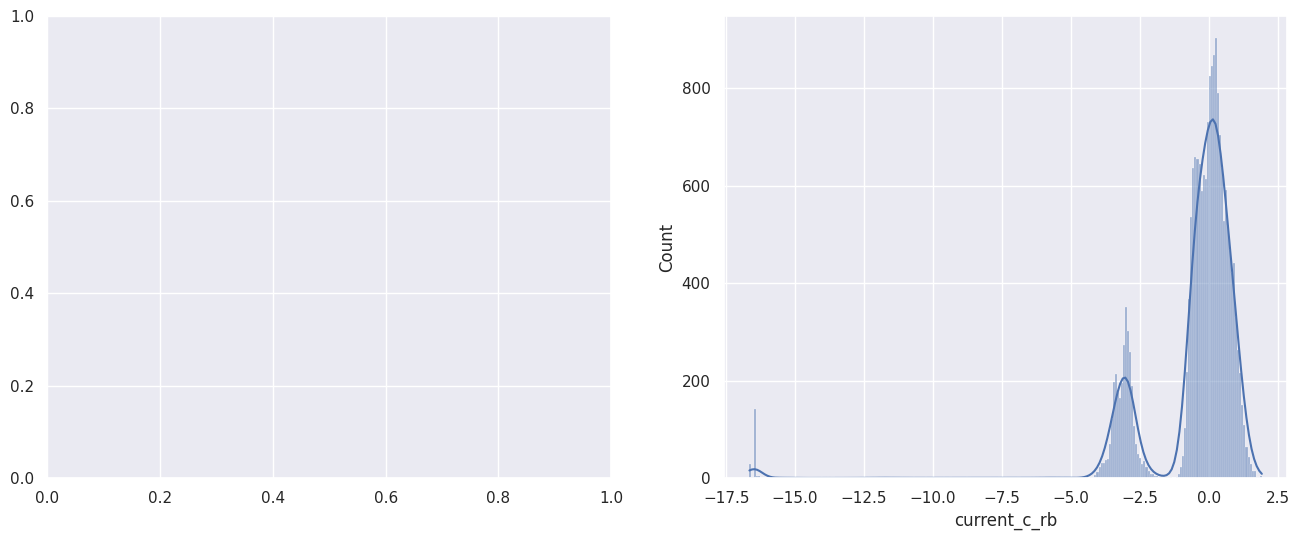

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
#sns.histplot(data=frj1n, x=col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data') 
sns.histplot(data=frj1n_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (10 & 99 percentile)')

# No se grafica el set de datos original porque las variables originales tiene valores negativos



> La potencia y la corriente tienen un comportamiento muy similar ya que son directamente proporcionales P = 1.73*V*I (P = Potencia,  V = voltaje, I = Corriente, 1.73 = Constante para sistemas trifasicos, que es igual a la raiz de 3).  Se utilizó la transformacion de potencia para tener la disponibilidad de aplicar la misma transformacion al triangulo de potencias, con la idea de aplicar el metodo Box Cox a las potencias Activa (kW) y Aparente (kVA) y el metodo Yeo Johnson a la potencia Reactiva (kVAR) ya que puede tener valores negativos.  Al final de dejaron todas las transfomaciones con el segundo metodos por un tema que aun debemos de corregir respecto a valores negativos indicados para la potencia activa. 



# Transformacion Variables Categoricas 💻

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
col_ab = 'vclasif_ab'
col_bc = 'vclasif_bc'
col_ca = 'vclasif_ca'

In [ ]:
frj1n_99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19542 entries, 3 to 21932
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               19542 non-null  datetime64[ns]
 1   voltage_ab         19542 non-null  float64       
 2   voltage_bc         19542 non-null  float64       
 3   voltage_ca         19542 non-null  float64       
 4   voltage_avg        19542 non-null  float64       
 5   voltage_unbalance  19542 non-null  float64       
 6   current_a          19542 non-null  float64       
 7   current_b          19542 non-null  float64       
 8   current_c          19542 non-null  float64       
 9   current_avg        19542 non-null  float64       
 10  true_power         19542 non-null  float64       
 11  reactive_power     19542 non-null  float64       
 12  apparent_power     19542 non-null  float64       
 13  frequency          19538 non-null  float64       
 14  commut

## One Hot Enconder

In [ ]:
from category_encoders import OneHotEncoder

In [ ]:
onehot_enc_ab = OneHotEncoder(use_cat_names=True) #, handle_unknown='ignore'   )

### Feature: vclasif_ab

In [ ]:
#onehot_enc_ab.fit_transform(frj1n[[col_ab]])
encoder_ab = pd.DataFrame(onehot_enc_ab.fit_transform(frj1n_99[[col_ab]])) #.toarray())

In [ ]:
onehot_enc_ab.mapping[0]['mapping'] #   mapping[0]['mapping']

,vclasif_ab_Voltaje Normal,vclasif_ab_Bajo Voltaje,vclasif_ab_Alto Voltaje
1,1,0,0
2,0,1,0
3,0,0,1
-1,0,0,0
-2,0,0,0


In [ ]:
frj1n_99 = frj1n_99.join(encoder_ab)

### Feature: vclasif_bc

In [ ]:
onehot_enc_bc = OneHotEncoder(use_cat_names=True) #, handle_unknown='ignore'  )

In [ ]:
encoder_bc = pd.DataFrame(onehot_enc_bc.fit_transform(frj1n_99[[col_bc]])) #.toarray())
#onehot_enc_bc.fit_transform(frj1n[[col_bc]])

In [ ]:
onehot_enc_bc.mapping[0]['mapping'] #   mapping[0]['mapping']

,vclasif_bc_Voltaje Normal,vclasif_bc_Bajo Voltaje,vclasif_bc_Alto Voltaje
1,1,0,0
2,0,1,0
3,0,0,1
-1,0,0,0
-2,0,0,0


In [ ]:
frj1n_99 = frj1n_99.join(encoder_bc)

### Feature: vclasif_ca

In [ ]:
onehot_enc_ca = OneHotEncoder(use_cat_names=True) #, handle_unknown='ignore'  )

In [ ]:
#onehot_enc_ca.fit_transform(frj1n[[col_ca]])
encoder_ca = pd.DataFrame(onehot_enc_ca.fit_transform(frj1n_99[[col_ca]])) #.toarray())

In [ ]:
onehot_enc_ca.mapping[0]['mapping'] #   mapping[0]['mapping']

,vclasif_ca_Voltaje Normal,vclasif_ca_Bajo Voltaje,vclasif_ca_Alto Voltaje
1,1,0,0
2,0,1,0
3,0,0,1
-1,0,0,0
-2,0,0,0


In [ ]:
frj1n_99 = frj1n_99.join(encoder_ca)

In [ ]:
frj1n_99.shape

(19542, 39)

In [ ]:
frj1n_99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19542 entries, 3 to 21932
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       19542 non-null  datetime64[ns]
 1   voltage_ab                 19542 non-null  float64       
 2   voltage_bc                 19542 non-null  float64       
 3   voltage_ca                 19542 non-null  float64       
 4   voltage_avg                19542 non-null  float64       
 5   voltage_unbalance          19542 non-null  float64       
 6   current_a                  19542 non-null  float64       
 7   current_b                  19542 non-null  float64       
 8   current_c                  19542 non-null  float64       
 9   current_avg                19542 non-null  float64       
 10  true_power                 19542 non-null  float64       
 11  reactive_power             19542 non-null  float64       
 12  appa



> Las variables categoricas que representan el comportamiento del voltaje de suministro, en un rango de Alto, Normal y Bajo se utilizaron para transformarlas en caracteristicas numericas que solo nos sirven para entrenamiento del modelo.  Como la cardinalidad de cada variable es de 3 categorias se tendran al final nueve variables nuevas.



## Binary Encoder

Para variables que son categoricas y binarias

In [ ]:
from category_encoders import BinaryEncoder

In [ ]:
bin_encoder = BinaryEncoder()

In [ ]:
col_k = "kvar_warn"
col_f = "frequency_error"

### Feature: kvar_warn

In [ ]:
kvarwarning = bin_encoder.fit_transform(frj1n_99[col_k])
kvarwarning

,kvar_warn_0,kvar_warn_1
3,0,1
4,0,1
6,0,1
8,0,1
9,0,1
...,...,...
21893,0,1
21894,0,1
21901,0,1
21931,0,1


In [ ]:
frj1n_99 = frj1n_99.join(kvarwarning)

### Feature: frequency_error

In [ ]:
frequencyuency = bin_encoder.fit_transform(frj1n_99[col_f])
frequencyuency

,frequency_error_0,frequency_error_1
3,0,1
4,0,1
6,0,1
8,0,1
9,0,1
...,...,...
21893,0,1
21894,0,1
21901,0,1
21931,0,1


In [ ]:
frj1n_99 = frj1n_99.join(frequencyuency)

In [ ]:
frj1n_99.shape

(19542, 43)

In [ ]:
frj1n_99

,date,voltage_ab,voltage_bc,voltage_ca,voltage_avg,voltage_unbalance,current_a,current_b,current_c,current_avg,...,vclasif_bc_Voltaje Normal,vclasif_bc_Bajo Voltaje,vclasif_bc_Alto Voltaje,vclasif_ca_Voltaje Normal,vclasif_ca_Bajo Voltaje,vclasif_ca_Alto Voltaje,kvar_warn_0,kvar_warn_1,frequency_error_0,frequency_error_1
3,2022-12-01 11:30:00,13517.328,13586.898,13539.01900,13547.75900,0.328185,26.215769,23.377346,23.132750,24.241957,...,1,0,0,1,0,0,0,1,0,1
4,2022-12-01 11:15:00,13527.545,13599.054,13550.37300,13558.99100,0.325932,26.574001,23.642118,23.445925,24.554014,...,1,0,0,1,0,0,0,1,0,1
6,2022-12-01 10:45:00,13561.952,13630.493,13585.39800,13592.61500,0.317956,26.077366,23.239059,22.997168,24.104530,...,1,0,0,1,0,0,0,1,0,1
8,2022-12-01 10:15:00,13521.686,13586.795,13543.39700,13550.62207,0.312951,26.728487,24.028473,23.636028,24.797642,...,1,0,0,1,0,0,0,1,0,1
9,2022-12-01 10:00:00,13537.416,13599.194,13562.14100,13566.25700,0.331404,26.516167,23.588799,23.372272,24.492405,...,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21893,2022-04-17 11:00:00,13872.873,13978.702,13904.58000,13918.71000,0.467038,31.855549,29.059206,28.378527,29.764421,...,1,0,0,1,0,0,0,1,0,1
21894,2022-04-17 10:45:00,13891.187,13974.712,13912.98900,13926.29900,0.321755,31.645304,28.725571,28.087793,29.486216,...,1,0,0,1,0,0,0,1,0,1
21901,2022-04-17 09:00:00,13953.583,14023.632,13990.28125,13989.16100,0.318742,31.718657,28.529686,28.006222,29.418190,...,1,0,0,1,0,0,0,1,0,1
21931,2022-04-17 01:30:00,13858.353,13957.397,13916.41400,13910.70900,0.328898,32.471920,29.166483,28.850023,30.162807,...,1,0,0,1,0,0,0,1,0,1


In [ ]:
frj1n_99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19542 entries, 3 to 21932
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       19542 non-null  datetime64[ns]
 1   voltage_ab                 19542 non-null  float64       
 2   voltage_bc                 19542 non-null  float64       
 3   voltage_ca                 19542 non-null  float64       
 4   voltage_avg                19542 non-null  float64       
 5   voltage_unbalance          19542 non-null  float64       
 6   current_a                  19542 non-null  float64       
 7   current_b                  19542 non-null  float64       
 8   current_c                  19542 non-null  float64       
 9   current_avg                19542 non-null  float64       
 10  true_power                 19542 non-null  float64       
 11  reactive_power             19542 non-null  float64       
 12  appa



> Las variables predictoras de frecuencia (frequency_error) y Potencia reactiva (kvar_warn) unicamente tienen dos categorias: cumple o no cumple una determinada condicion propia de cada una. Por tal motivo se utilizó la codificacion Binaria para ambas para evaluar en en entrenamiento del modelo.



## Limpieza de Dataset 

In [ ]:
#se elimnan variables ya codificadas
df_frj = pd.DataFrame(data=frj1n_99)
del df_frj['date']
del df_frj['voltage_ab']
del df_frj['voltage_bc']
del df_frj['voltage_ca']
del df_frj['voltage_avg']
del df_frj['kvar_warn']
del df_frj['frequency_error']
del df_frj['current_avg']
del df_frj['true_power']
del df_frj['frequency']
del df_frj['current_a']
del df_frj['current_b']
del df_frj['current_c']
del df_frj['reactive_power']
del df_frj['apparent_power']
del df_frj['voltage_unbalance']
del df_frj['vclasif_ab']
del df_frj['vclasif_bc']
del df_frj['vclasif_ca']
del df_frj['voltage_avg_sd_2']



In [ ]:
df_frj

,commute,voltage_avg_mm,voltage_avg_sd,current_avg_rb,current_a_rb,current_b_rb,current_c_rb,true_power_bx,reactive_power_bx,apparent_power_bx,...,vclasif_bc_Voltaje Normal,vclasif_bc_Bajo Voltaje,vclasif_bc_Alto Voltaje,vclasif_ca_Voltaje Normal,vclasif_ca_Bajo Voltaje,vclasif_ca_Alto Voltaje,kvar_warn_0,kvar_warn_1,frequency_error_0,frequency_error_1
3,0,0.874557,-0.037828,-3.971240,-3.930514,-4.342031,-3.602632,-2.233736,-2.139437,-2.213524,...,1,0,0,1,0,0,0,1,0,1
4,0,0.875719,0.009250,-3.788021,-3.733090,-4.172002,-3.425900,-2.161677,-2.133113,-2.155608,...,1,0,0,1,0,0,0,1,0,1
6,0,0.879200,0.150181,-4.051928,-4.006789,-4.430835,-3.679144,-2.245763,-2.140216,-2.223188,...,1,0,0,1,0,0,0,1,0,1
8,0,0.874853,-0.025828,-3.644979,-3.647952,-3.923895,-3.318621,-2.107422,-2.130101,-2.112123,...,1,0,0,1,0,0,0,1,0,1
9,0,0.876472,0.039704,-3.824194,-3.764963,-4.206242,-3.467464,-2.170734,-2.137682,-2.164307,...,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21893,0,0.912952,1.516977,-0.728815,-0.822392,-0.693296,-0.642320,-0.032161,0.211343,-0.044036,...,1,0,0,1,0,0,0,1,0,1
21894,0,0.913738,1.548785,-0.892159,-0.938259,-0.907548,-0.806388,-0.169532,-0.072314,-0.198699,...,1,0,0,1,0,0,0,1,0,1
21901,0,0.920245,1.812265,-0.932099,-0.897834,-1.033340,-0.852421,-0.153864,0.210723,-0.163846,...,1,0,0,1,0,0,0,1,0,1
21931,0,0.912124,1.483442,-0.494909,-0.482705,-0.624406,-0.376244,0.191266,0.419188,0.189299,...,1,0,0,1,0,0,0,1,0,1


In [ ]:
df_frj.describe()

,commute,voltage_avg_mm,voltage_avg_sd,current_avg_rb,current_a_rb,current_b_rb,current_c_rb,true_power_bx,reactive_power_bx,apparent_power_bx,...,vclasif_bc_Voltaje Normal,vclasif_bc_Bajo Voltaje,vclasif_bc_Alto Voltaje,vclasif_ca_Voltaje Normal,vclasif_ca_Bajo Voltaje,vclasif_ca_Alto Voltaje,kvar_warn_0,kvar_warn_1,frequency_error_0,frequency_error_1
count,19542.000000,19542.000000,1.954200e+04,19542.000000,19542.000000,1.954200e+04,1.954200e+04,1.954200e+04,1.954200e+04,1.954200e+04,...,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000
mean,0.009364,0.875491,-2.232490e-15,-0.587824,-0.563780,-6.596751e-01,-5.301488e-01,-2.327026e-16,2.792431e-16,2.559728e-16,...,0.998925,0.000819,0.000256,0.998209,0.001535,0.000256,0.036230,0.963770,0.000563,0.999437
std,0.096318,0.024695,1.000026e+00,2.240385,2.248203,2.398640e+00,2.053245e+00,1.000026e+00,1.000026e+00,1.000026e+00,...,0.032764,0.028603,0.015994,0.042284,0.039152,0.015994,0.186866,0.186866,0.023719,0.023719
min,0.000000,0.000000,-3.545246e+01,-18.204511,-18.378209,-1.935432e+01,-1.665697e+01,-3.181543e+00,-2.147856e+00,-2.857215e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.861591,-5.628644e-01,-0.556631,-0.542730,-5.602757e-01,-5.616147e-01,-1.465463e-02,1.686975e-02,-3.552842e-02,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,0.000000,0.875807,1.279766e-02,0.000000,0.000000,1.140730e-15,-1.002440e-15,3.256117e-01,3.191797e-01,3.144506e-01,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.000000,0.892668,6.955678e-01,0.443369,0.457270,4.397243e-01,4.383853e-01,6.016825e-01,5.838581e-01,6.078017e-01,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,5.041913e+00,1.971877,2.071696,1.900970e+00,1.923428e+00,1.735301e+00,3.110825e+00,1.866353e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_frj.info() # Dataset solo con varibles transformadas y escaladas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19542 entries, 3 to 21932
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   commute                    19542 non-null  int64  
 1   voltage_avg_mm             19542 non-null  float64
 2   voltage_avg_sd             19542 non-null  float64
 3   current_avg_rb             19542 non-null  float64
 4   current_a_rb               19542 non-null  float64
 5   current_b_rb               19542 non-null  float64
 6   current_c_rb               19542 non-null  float64
 7   true_power_bx              19542 non-null  float64
 8   reactive_power_bx          19542 non-null  float64
 9   apparent_power_bx          19542 non-null  float64
 10  vclasif_ab_Voltaje Normal  19542 non-null  int64  
 11  vclasif_ab_Bajo Voltaje    19542 non-null  int64  
 12  vclasif_ab_Alto Voltaje    19542 non-null  int64  
 13  vclasif_bc_Voltaje Normal  19542 non-null  int

In [ ]:
df_frj.describe()

,commute,voltage_avg_mm,voltage_avg_sd,current_avg_rb,current_a_rb,current_b_rb,current_c_rb,true_power_bx,reactive_power_bx,apparent_power_bx,...,vclasif_bc_Voltaje Normal,vclasif_bc_Bajo Voltaje,vclasif_bc_Alto Voltaje,vclasif_ca_Voltaje Normal,vclasif_ca_Bajo Voltaje,vclasif_ca_Alto Voltaje,kvar_warn_0,kvar_warn_1,frequency_error_0,frequency_error_1
count,19542.000000,19542.000000,1.954200e+04,19542.000000,19542.000000,1.954200e+04,1.954200e+04,1.954200e+04,1.954200e+04,1.954200e+04,...,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000,19542.000000
mean,0.009364,0.875491,-2.232490e-15,-0.587824,-0.563780,-6.596751e-01,-5.301488e-01,-2.327026e-16,2.792431e-16,2.559728e-16,...,0.998925,0.000819,0.000256,0.998209,0.001535,0.000256,0.036230,0.963770,0.000563,0.999437
std,0.096318,0.024695,1.000026e+00,2.240385,2.248203,2.398640e+00,2.053245e+00,1.000026e+00,1.000026e+00,1.000026e+00,...,0.032764,0.028603,0.015994,0.042284,0.039152,0.015994,0.186866,0.186866,0.023719,0.023719
min,0.000000,0.000000,-3.545246e+01,-18.204511,-18.378209,-1.935432e+01,-1.665697e+01,-3.181543e+00,-2.147856e+00,-2.857215e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.861591,-5.628644e-01,-0.556631,-0.542730,-5.602757e-01,-5.616147e-01,-1.465463e-02,1.686975e-02,-3.552842e-02,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,0.000000,0.875807,1.279766e-02,0.000000,0.000000,1.140730e-15,-1.002440e-15,3.256117e-01,3.191797e-01,3.144506e-01,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.000000,0.892668,6.955678e-01,0.443369,0.457270,4.397243e-01,4.383853e-01,6.016825e-01,5.838581e-01,6.078017e-01,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,5.041913e+00,1.971877,2.071696,1.900970e+00,1.923428e+00,1.735301e+00,3.110825e+00,1.866353e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# ALGORITMOS DE MODELADO 🚧

In [ ]:
from sklearn import linear_model

In [ ]:
# A CONTINUACION CODIGO EJEMPLO, MACHOTE

In [ ]:
# EVALUANDO EL PRIMER MODELO (REGRESION LINEAL) CON EL DATAFRAME SIN EDICIÓN 
model = linear_model.LinearRegression()
model.fit(frj1n_train[['true_power', 'current_avg']],frj1n_train['commute'])

LinearRegression()

In [ ]:
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Negative sum of coaefficients:{np.sum(model.coef_*-1)}')

Coefficients: [-0.00173766  0.02683853]
Intercept: 0.40022700497405694
Negative sum of coaefficients:-0.025100868251336266


In [ ]:
model.score(frj1n_train[['true_power', 'current_avg']],frj1n_train['commute'])

0.3685446123971402

In [ ]:
model2 = linear_model.LinearRegression()
model2.fit(df_frj[['true_power_bx', 'current_avg_rb']],df_frj['commute'])

LinearRegression()

In [ ]:
print(f'Coefficients: {model2.coef_}')
print(f'Intercept: {model2.intercept_}')
print(f'Negative sum of coaefficients:{np.sum(model2.coef_*-1)}')

Coefficients: [ 0.09022285 -0.06382135 -0.06881346  0.06881346]
Intercept: -0.09688727377814293
Negative sum of coaefficients:-0.026401500220614382


In [ ]:
model2.score(df_frj[['true_power_bx', 'current_avg_rb']],df_frj['commute'])

0.751855195696635

# TABLA COMPARATIVA DE RESULTADOS 🧭

No nos estremos tanto en mejorar el rendimiento del modelo. Mejor aplicar métodos y analizar por qué un método u otro.

Aunque las suposiciones estén incorrectas, tal vez por este tipo de situación conviene o no.


FASES
MODELOS: dos tipos de modelos, un linea y no lineal...logistic regression y random forest
TRANSOFMRACIONES



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
seed = 6011
classifier_names = ['LR',
                    'kNN',
                    'RBF SVM',
                    'Random Forest',
                    'Boosted Trees']
classifiers = [LogisticRegression(random_state=seed),
               KNeighborsClassifier(5),
               SVC(gamma=2, C=1, random_state=seed),
               RandomForestClassifier(max_depth=5, n_estimators=10, 
                                      max_features=1, random_state=seed),
               GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,
                                          max_depth=5, random_state=seed)]
for model in classifiers:
    model.fit(df_frj[['true_power_bx', 'current_avg_rb']], df_frj['commute'])

In [ ]:
def test_roc(model, data, labels):
    if hasattr(model, "decision_function"):
        predictions = model.decision_function(data)
    else:
        predictions = model.predict_proba(data)[:,1]
    fpr, tpr, _ = roc_curve(labels, predictions) # sklearn.metrics.roc_curve
    auc_score = roc_auc_score(labels, predictions)
    print(f'{model.__class__.__name__}: {auc_score}')
    return fpr, tpr

LogisticRegression: 0.9965004063288505
KNeighborsClassifier: 0.9999506026058678
SVC: 0.9996993815728525
RandomForestClassifier: 0.9999902616565854
GradientBoostingClassifier: 0.9999920964169389


Text(0.04, 0.5, 'True Positive Rate')

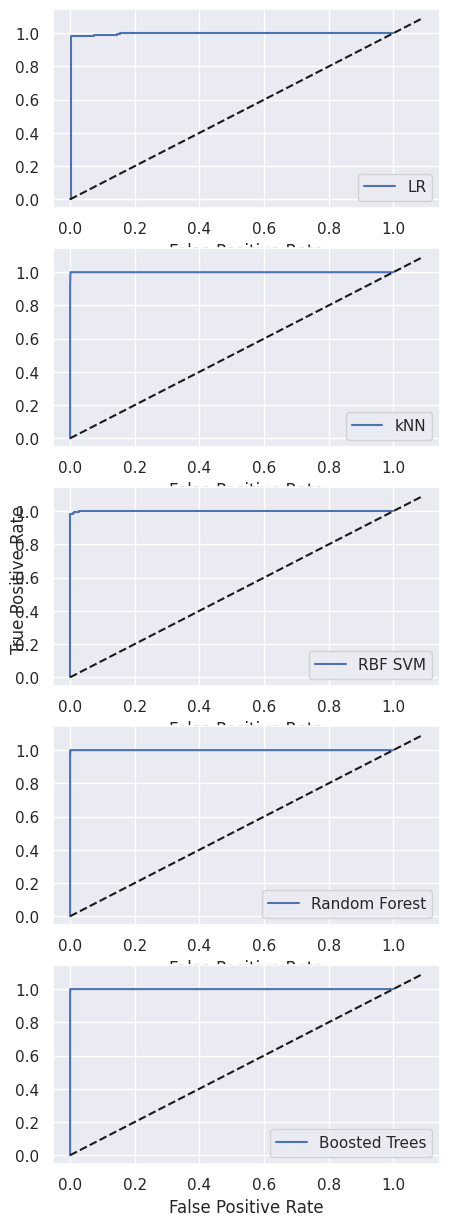

In [ ]:
fig, axs = plt.subplots(5,figsize=(5,15))


for i, model in enumerate(classifiers):
    fpr, tpr = test_roc(model, df_frj[['true_power_bx', 'current_avg_rb']], df_frj['commute'])    
    axs[i].plot(fpr, tpr, label=classifier_names[i])        
    axs[i].plot([0, 1.09], [0, 1.09], 'k--')
    axs[i].legend()
    axs[i].set(xlabel='False Positive Rate')

fig.text(0.04, 0.5, 'True Positive Rate', va='center', rotation='vertical')

# TABLA COMPARATIVA DE RESULTADOS 🧭

First column name  | Second column name 
-------------------|------------------
Row 1, Col 1       | Row 1, Col 2 
Row 2, Col 1       | Row 2, Col 2 